In [25]:
import webbrowser
#webbrowser.open('https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial')
webbrowser.open('https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba')

True

In [1]:
from sklearn import datasets
import webbrowser
import pandas as pd
import seaborn as sns
from pandas import read_csv

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

In [4]:
import io
import requests
import pandas as pd
from zipfile import ZipFile
from IPython.display import display_html

In [5]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 0.25.1
numpy version: 1.16.5
seaborn version: 0.9.0


In [6]:
#https://stackoverflow.com/questions/46568913/tensorflow-import-error-no-module-named-tensorflow
###<base> C:\Users\tae>
#conda install matplotlib --force
#conda create -n tensorflow python=3.5
#pip install tensorflow==1.13.1
#pip install tensorflow==1.14.0

###activate tensorflow
#pip install --ignore-installed --upgrade tensorflow
#python -m pip install --upgrade pip

In [7]:
#pip install tensorflow==1.13.1
#pip install keras
#print(cv2.__version__)
import tensorflow as tf
import keras
print(tf.__version__)

1.13.1


Using TensorFlow backend.


In [8]:
# Let`s import all packages that we may need:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [ ]:
#https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

In [61]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
df = read_csv('D:/Python_machine learning/PM25/Thailand.csv',  parse_dates = [['year','month','day','hour']], index_col=0, date_parser=parse)
#dataset.drop('No', axis=1, inplace=True)
# manually specify column names
df.columns = ['pm25', 'pm10', 'retrospective']
df.index.name = 'date'
# mark all NA values with 0
df['pm25'].fillna(0, inplace=True)
# drop the first 24 hours
df = df[24:]
df = df.drop(['pm10','retrospective'], axis=1) #ลบคอลัมน์
# summarize first 5 rows
print(df.head(5))
# save to file
#dataset.to_csv('D:/Python_machine learning/PM25/ThailandPM25NEW.csv')

                      pm25
date                      
2016-03-04 09:00:00  39.44
2016-03-04 10:00:00  36.34
2016-03-04 11:00:00  38.02
2016-03-04 12:00:00  37.83
2016-03-04 13:00:00  39.54


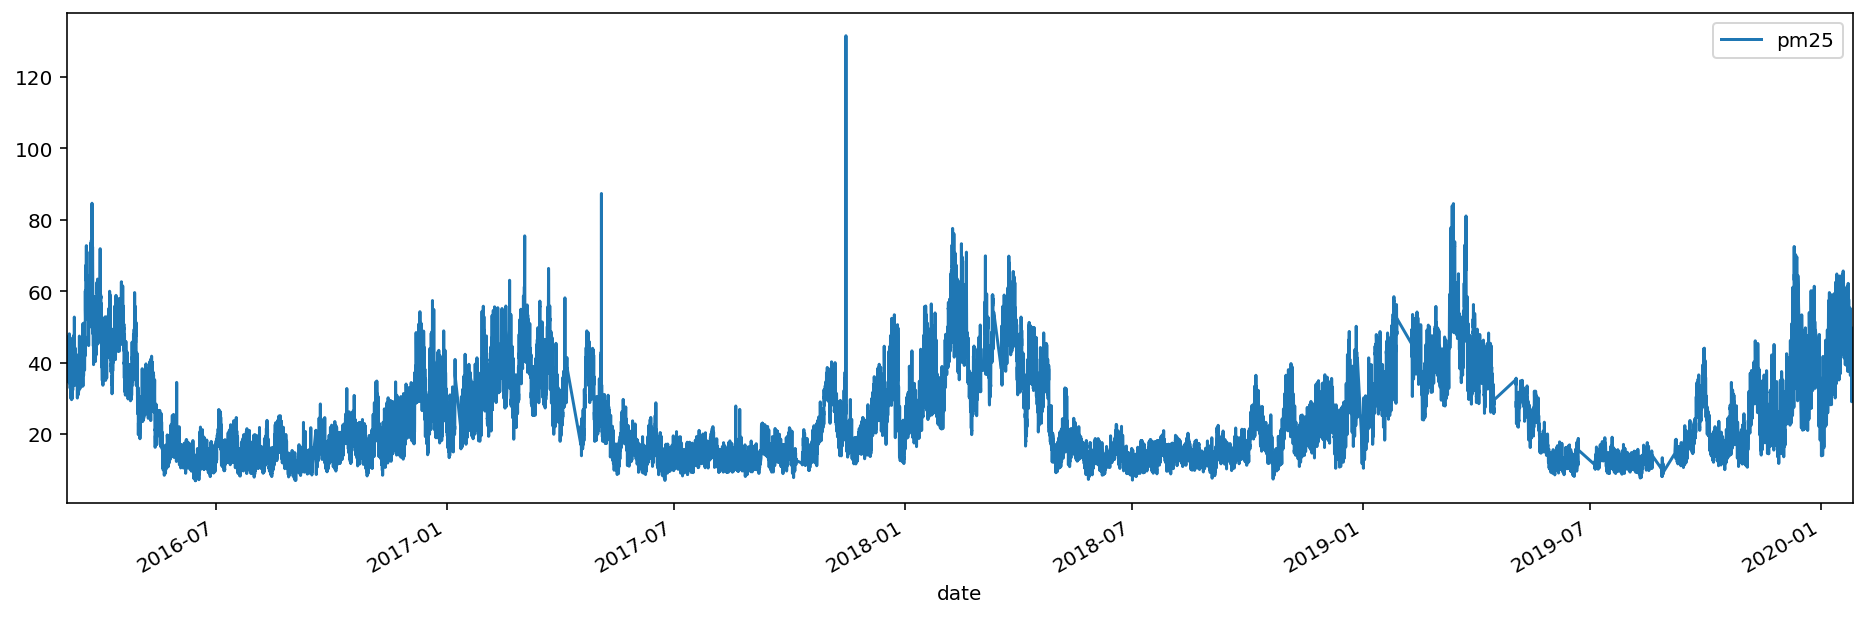

In [62]:
# line plot
df.plot(figsize=(16,5))
pyplot.show()

                      pm25
date                      
2016-03-04 09:00:00  39.44
2016-03-04 10:00:00  36.34
2016-03-04 11:00:00  38.02
2016-03-04 12:00:00  37.83
2016-03-04 13:00:00  39.54
RMSE: 3.035


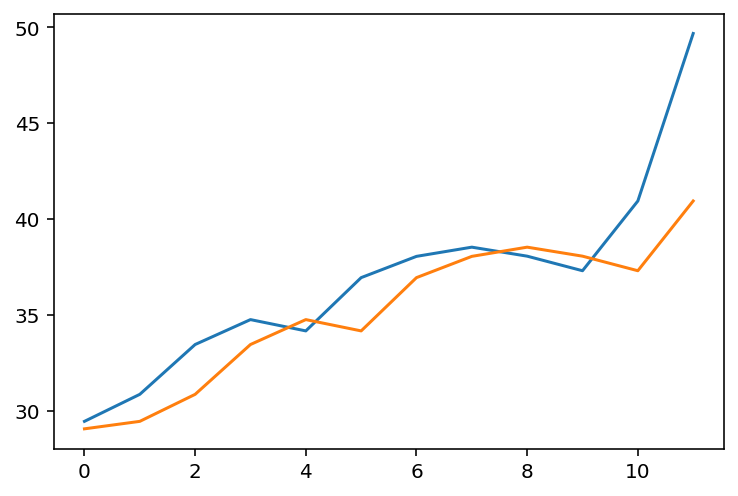

In [66]:
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
df = read_csv('D:/Python_machine learning/PM25/Thailand.csv',  parse_dates = [['year','month','day','hour']], index_col=0, date_parser=parse)
#dataset.drop('No', axis=1, inplace=True)
# manually specify column names
df.columns = ['pm25', 'pm10', 'retrospective']
df.index.name = 'date'
# mark all NA values with 0
df['pm25'].fillna(0, inplace=True)
# drop the first 24 hours
df = df[24:]
df = df.drop(['pm10','retrospective'], axis=1) #ลบคอลัมน์
# summarize first 5 rows
print(df.head(5))

# split data into train and test
X = df.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

## LSTM Data Preparation

## Transform Time Series to Supervised Learning

In [43]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [44]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# load dataset
df = df
# transform to supervised learning
X = df.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0      0
0   0.00  39.44
1  39.44  36.34
2  36.34  38.02
3  38.02  37.83
4  37.83  39.54


## Transform Time Series to Stationary

In [45]:
# create a differenced series
def difference(df, interval=1):
	diff = list()
	for i in range(interval, len(df)):
		value = df[i] - df[i - interval]
		diff.append(value)
	return Series(diff)

In [46]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [47]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
 
# create a differenced series
def difference(df, interval=1):
	diff = list()
	for i in range(interval, len(df)):
		value = df[i] - df[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

print(df.head())

                      pm25
date                      
2016-03-04 09:00:00  39.44
2016-03-04 10:00:00  36.34
2016-03-04 11:00:00  38.02
2016-03-04 12:00:00  37.83
2016-03-04 13:00:00  39.54


In [57]:
df = df.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [56]:
# transform to be stationary
#df = df.values
differenced = difference(df, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(df, differenced[i], len(df)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

0     [-3.0999999999999943]
1      [1.6799999999999997]
2    [-0.19000000000000483]
3      [1.7100000000000009]
4     [-1.3299999999999983]
dtype: object
0    [36.34]
1    [38.02]
2    [37.83]
3    [39.54]
4    [38.21]
dtype: object


In [64]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
 
# create a differenced series
def difference(df, interval=1):
	diff = list()
	for i in range(interval, len(df)):
		value = df[i] - df[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

#####################
# load dataset
#df = df
#####################
print(df.head())
# transform to be stationary
df = df.values
differenced = difference(df, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(df, differenced[i], len(df)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

                      pm25
date                      
2016-03-04 09:00:00  39.44
2016-03-04 10:00:00  36.34
2016-03-04 11:00:00  38.02
2016-03-04 12:00:00  37.83
2016-03-04 13:00:00  39.54
0     [-3.0999999999999943]
1      [1.6799999999999997]
2    [-0.19000000000000483]
3      [1.7100000000000009]
4     [-1.3299999999999983]
dtype: object
0    [36.34]
1    [38.02]
2    [37.83]
3    [39.54]
4    [38.21]
dtype: object


## Transform Time Series to Scale

In [69]:
# transform scale
X = df.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)

In [70]:
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)

In [71]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# load dataset
df = df
# transform scale
X = df.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0   -0.477856
1   -0.527599
2   -0.500642
3   -0.503691
4   -0.476252
dtype: float64
0    39.44
1    36.34
2    38.02
3    37.83
4    39.54
dtype: float64


## LSTM Model Development

In [72]:
X, y = train[:, 0:-1], train[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])

In [75]:
layer = LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True)

NameError: name 'neurons' is not defined

In [239]:
model = Sequential()
model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

NameError: name 'neurons' is not defined

In [240]:
for i in range(nb_epoch):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
	model.reset_states()

NameError: name 'nb_epoch' is not defined

## Basic Data Preparation

In [76]:
df = read_csv('D:/Python_machine learning/PM25/Thailand.csv')
df.dropna()
print('Number of rows and columns:', df.shape)
df.dropna().info()

Number of rows and columns: (30334, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30334 entries, 0 to 30333
Data columns (total 7 columns):
year             30334 non-null int64
month            30334 non-null int64
day              30334 non-null int64
hour             30334 non-null int64
pm25             30334 non-null float64
pm10             30334 non-null float64
retrospective    30334 non-null int64
dtypes: float64(2), int64(5)
memory usage: 1.9 MB


In [53]:
from pandas import read_csv
from datetime import datetime

In [77]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('D:/Python_machine learning/PM25/Thailand.csv',  parse_dates = [['year','month','day','hour']], index_col=0, date_parser=parse)
#dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pm25', 'pm10', 'retrospective']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pm25'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
#dataset.to_csv('D:/Python_machine learning/PM25/ThailandPM25NEW.csv')

                      pm25  pm10  retrospective
date                                           
2016-03-04 09:00:00  39.44   1.0              0
2016-03-04 10:00:00  36.34   1.0              0
2016-03-04 11:00:00  38.02   1.0              0
2016-03-04 12:00:00  37.83   1.0              0
2016-03-04 13:00:00  39.54   1.0              0


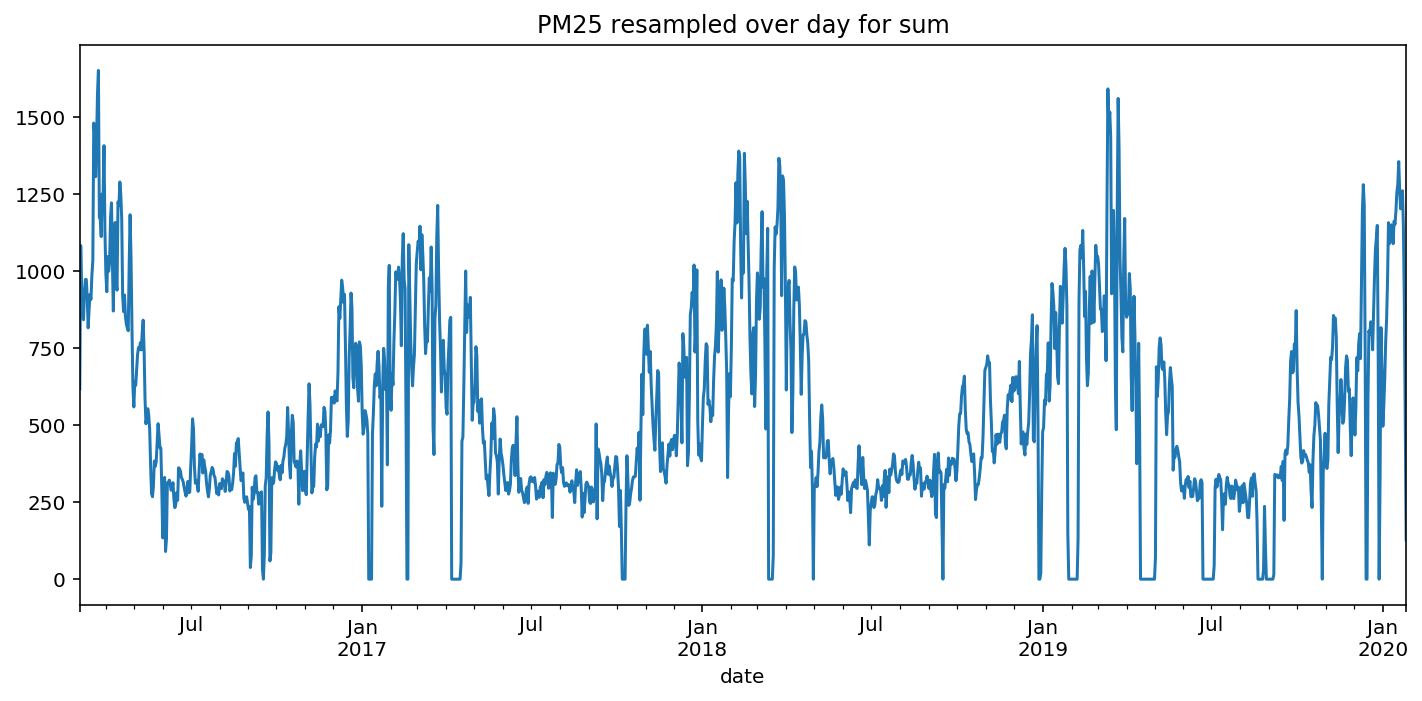

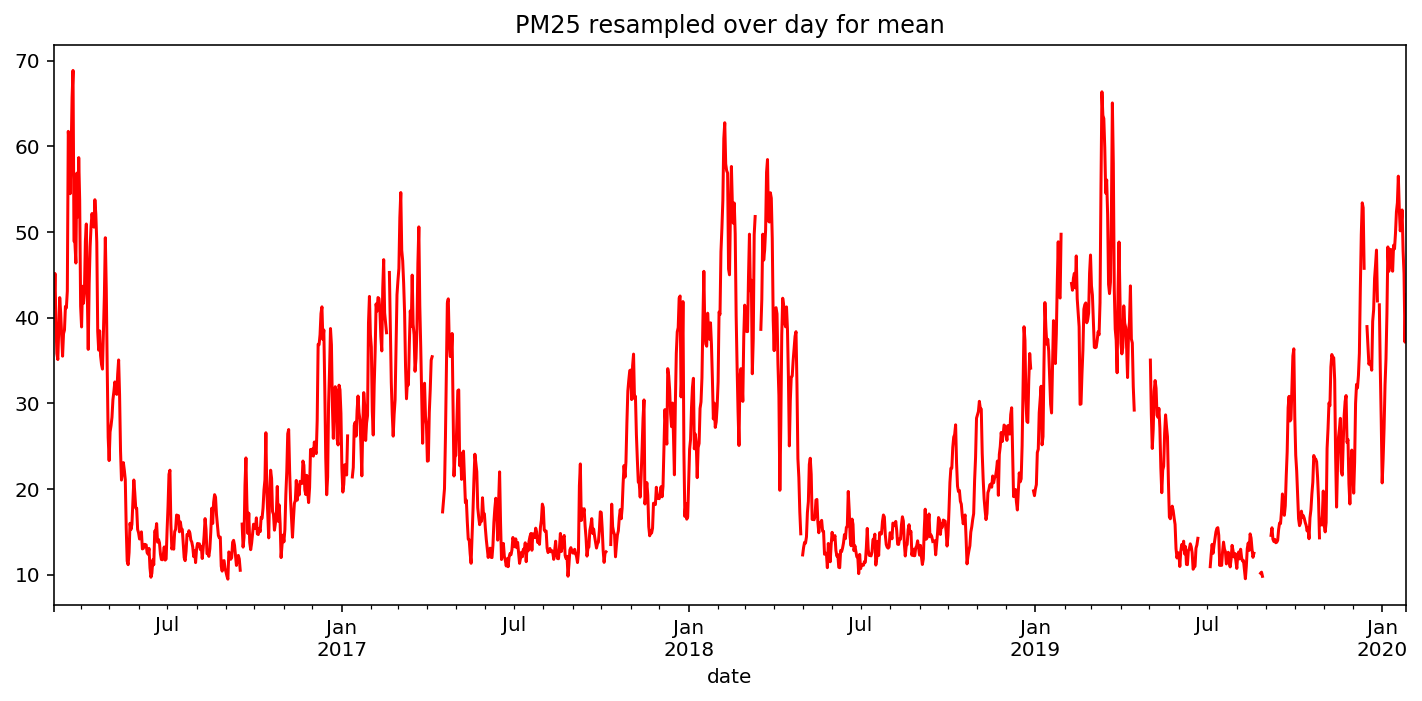

In [78]:
dataset.pm25.resample('D').sum().plot(title='PM25 resampled over day for sum', figsize=(10,5)) 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

dataset.pm25.resample('D').mean().plot(title='PM25 resampled over day for mean', color='red', figsize=(10,5)) 
plt.tight_layout()
plt.show()

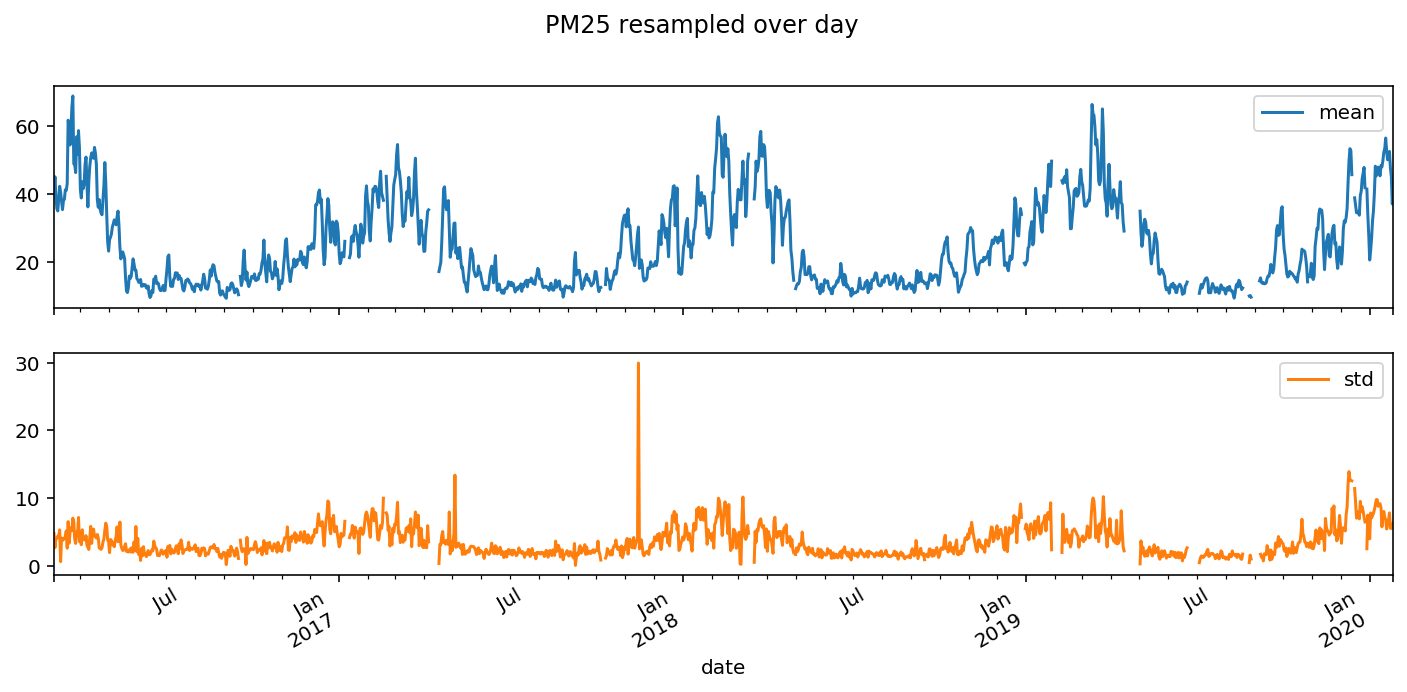

In [79]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = dataset.pm25.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='PM25 resampled over day', figsize=(12,5))
plt.show()

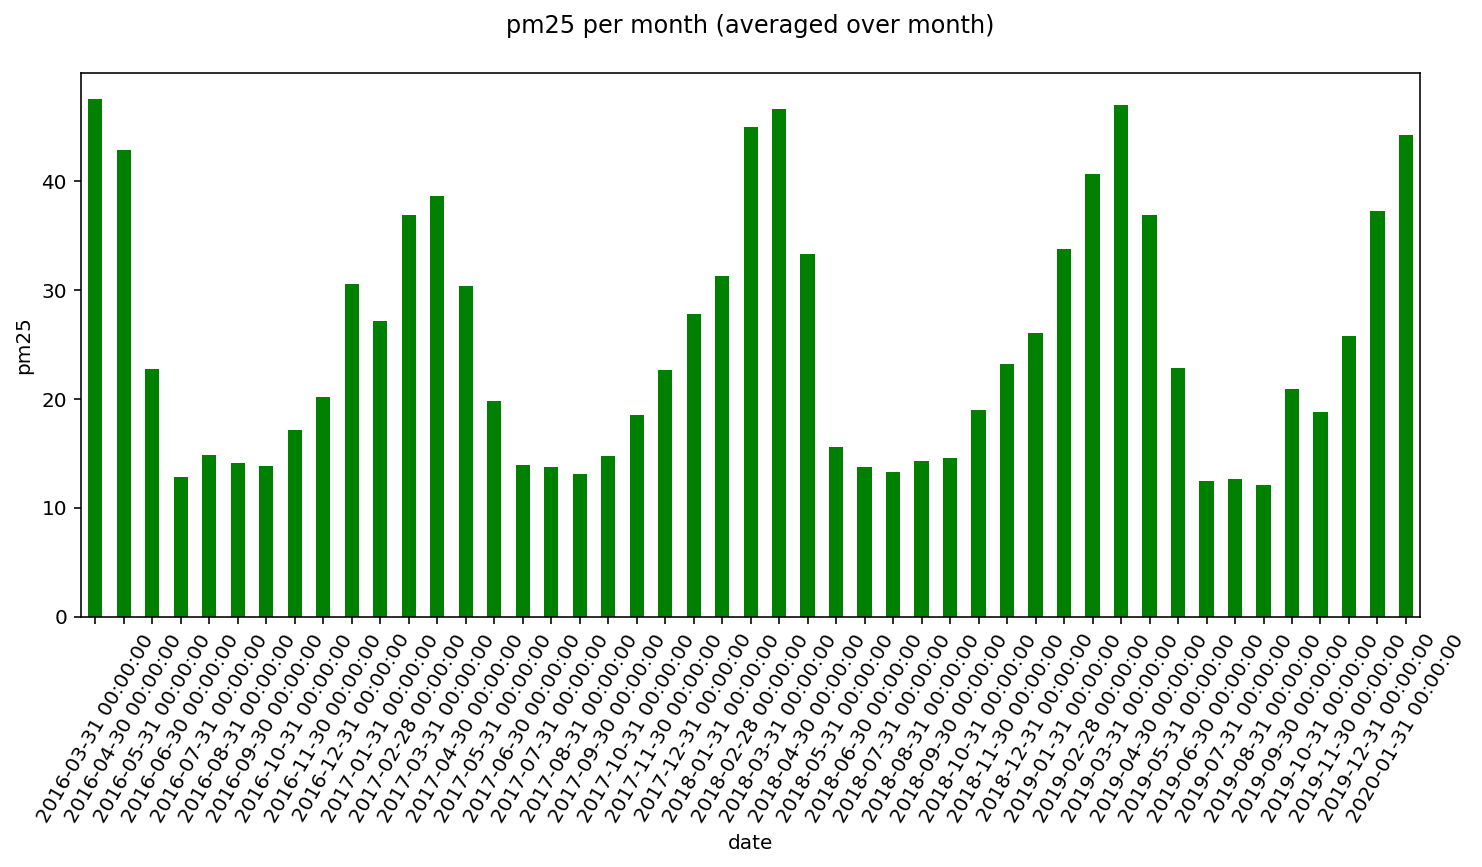

In [80]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
dataset['pm25'].resample('M').mean().plot(kind='bar', color='green', figsize=(12,5))
plt.xticks(rotation=60)
plt.ylabel('pm25')
plt.title('pm25 per month (averaged over month)\n')
plt.show()

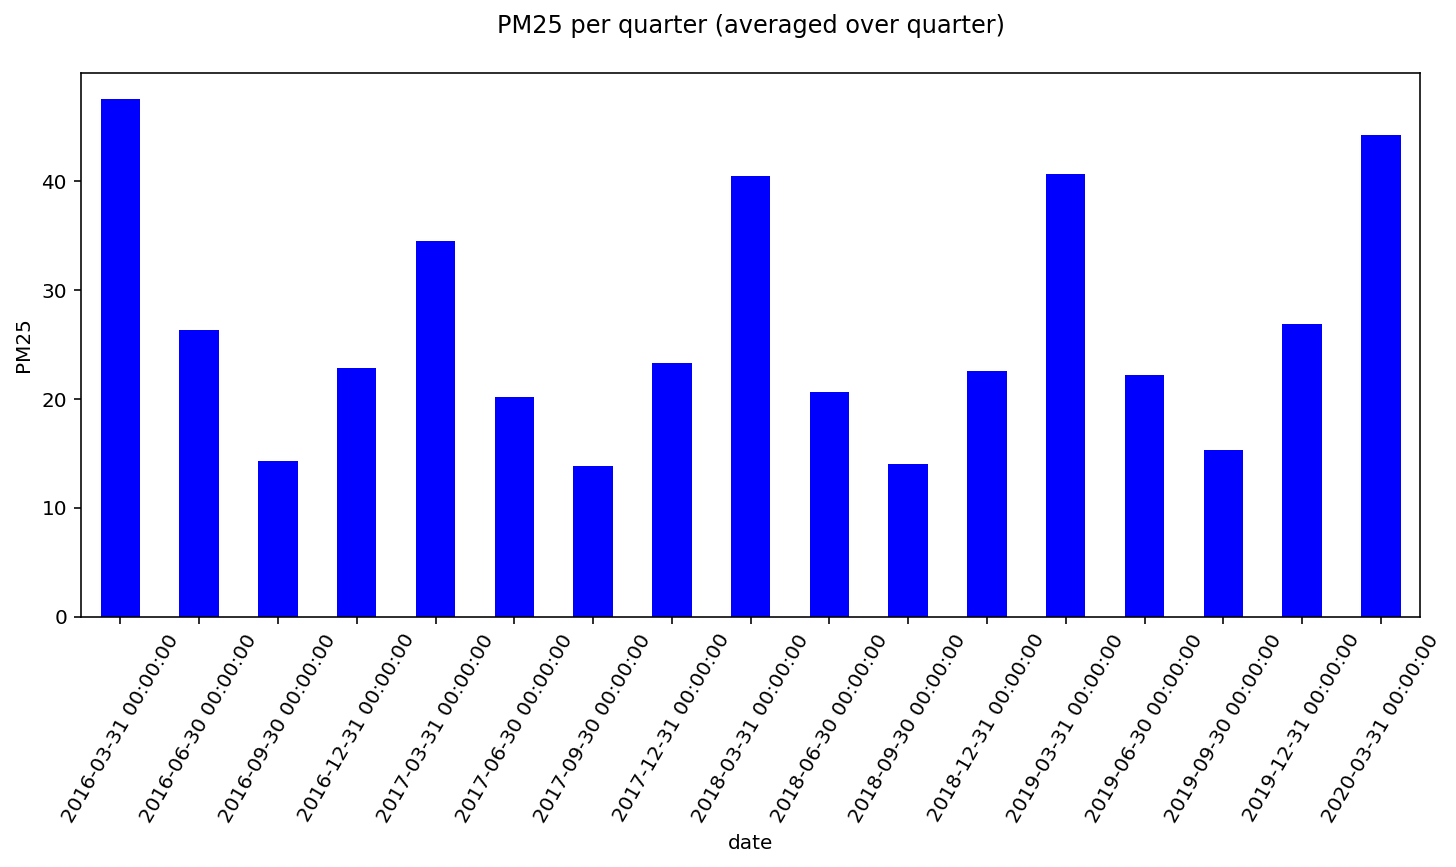

In [81]:
## Mean of 'Global_active_power' resampled over quarter
dataset['pm25'].resample('Q').mean().plot(kind='bar', color='blue', figsize=(12,5))
plt.xticks(rotation=60)
plt.ylabel('PM25')
plt.title('PM25 per quarter (averaged over quarter)\n')
plt.show()

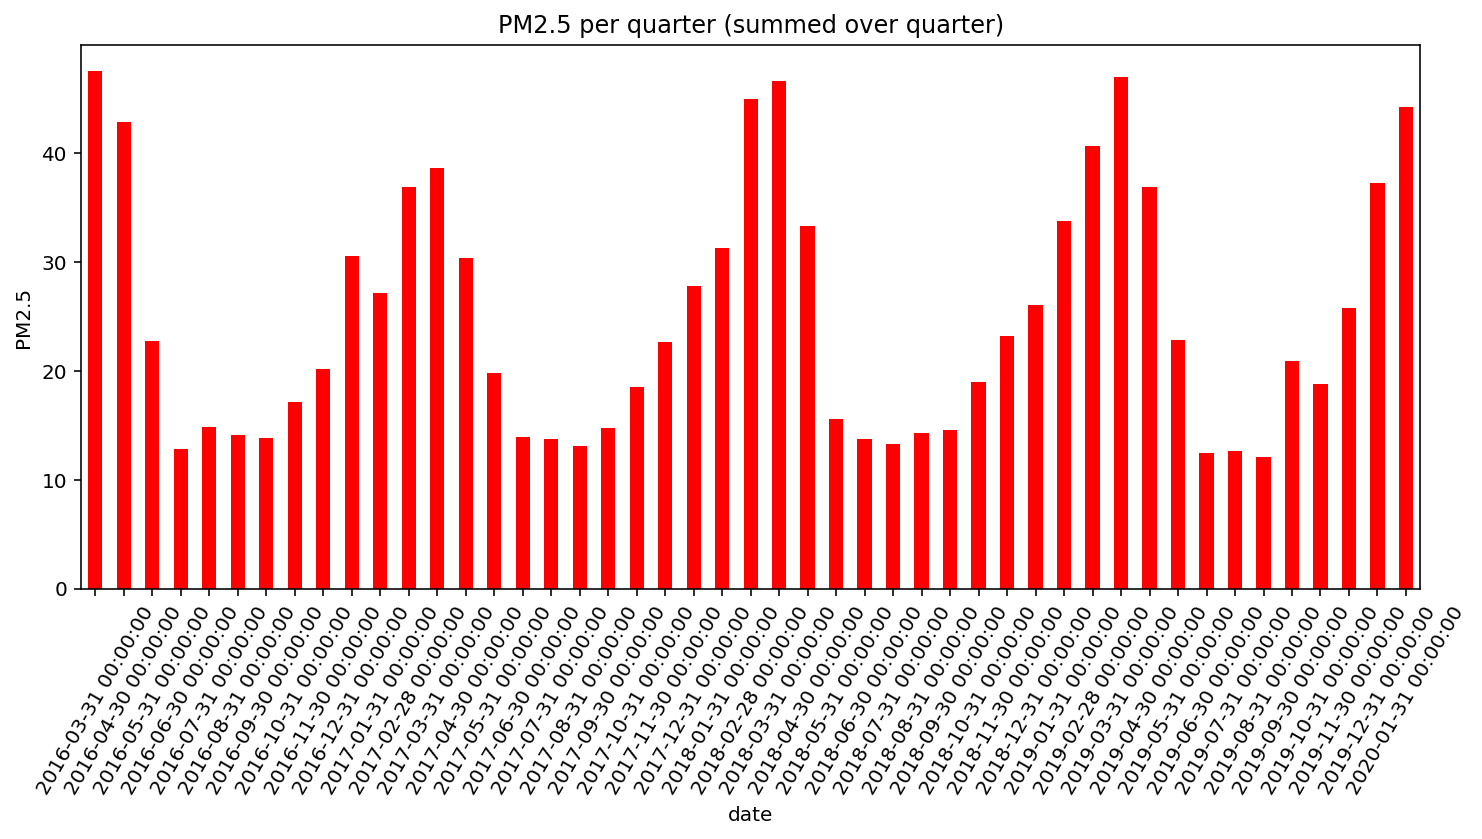

In [82]:
## mean of 'Voltage' resampled over month
dataset['pm25'].resample('M').mean().plot(kind='bar', color='red',figsize=(12,5))
plt.xticks(rotation=60)
plt.ylabel('PM2.5')
plt.title('PM2.5 per quarter (summed over quarter)')
plt.show()

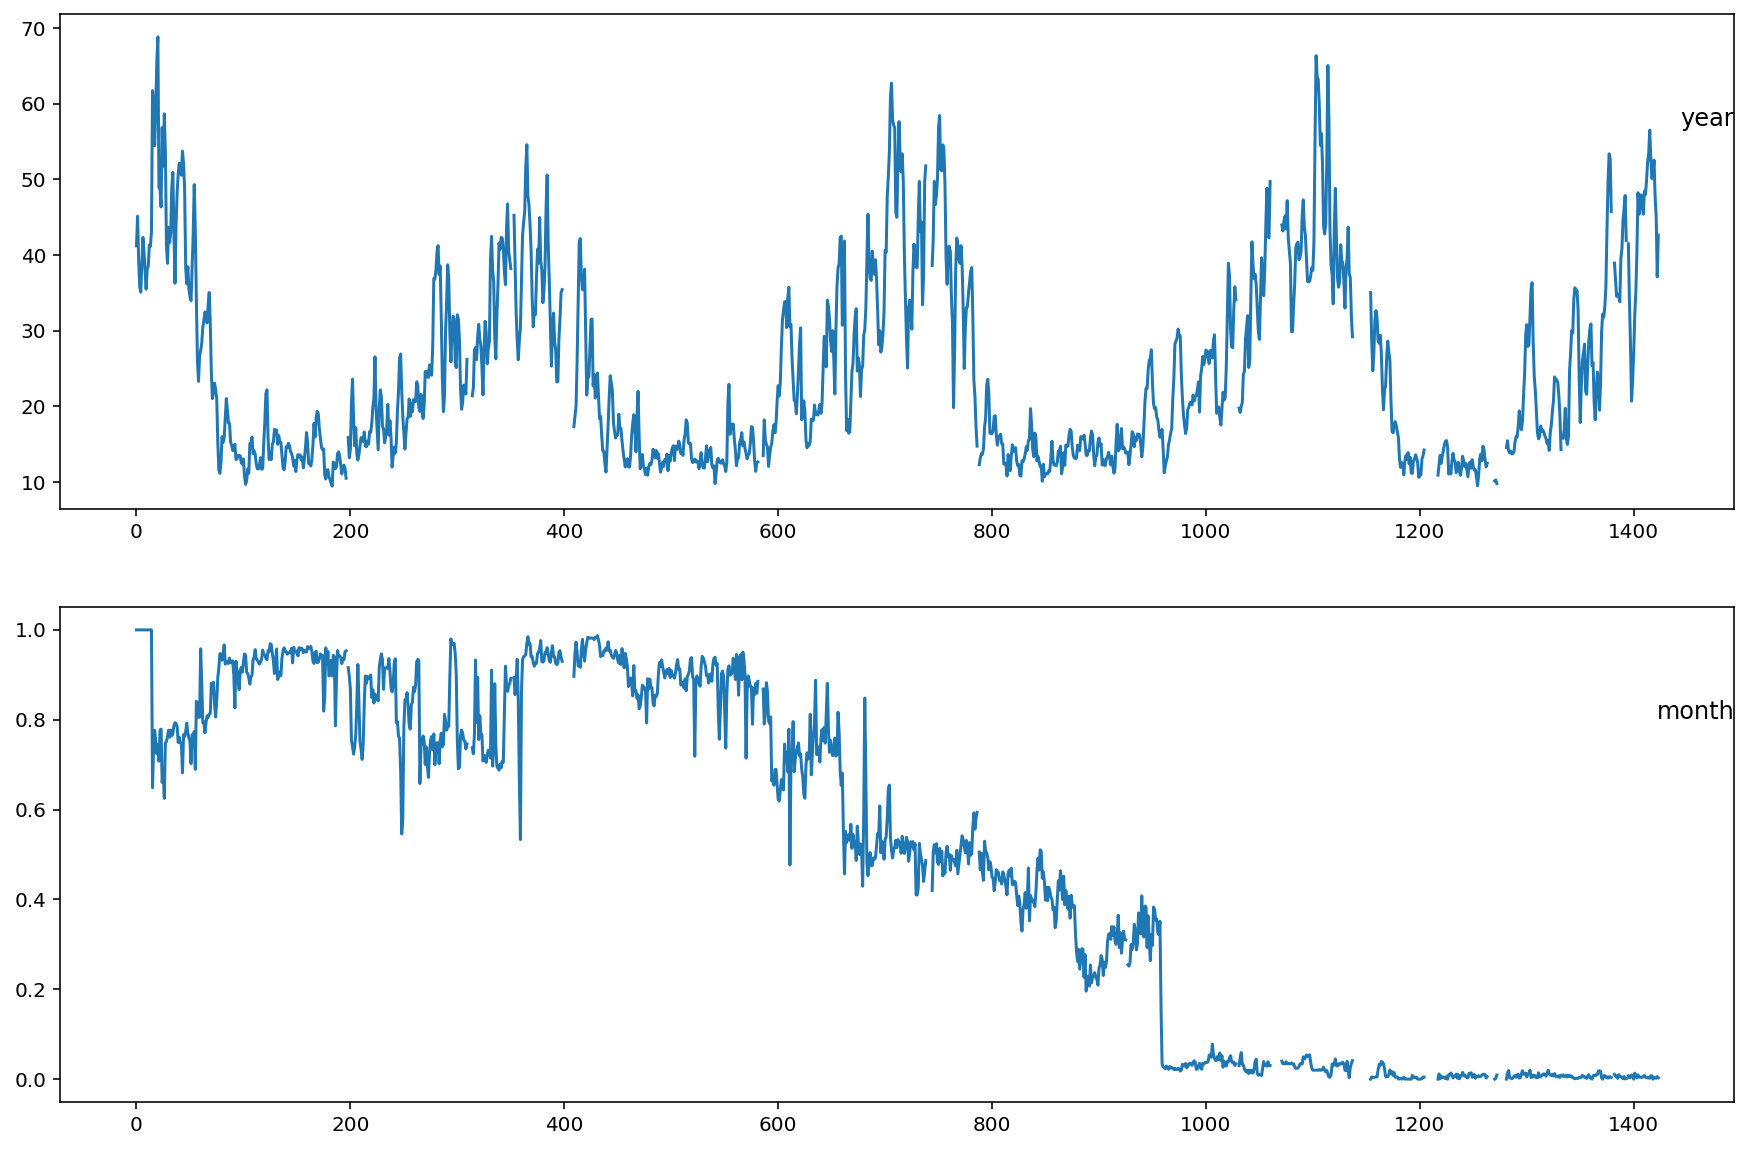

In [83]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1]
i = 1
groups=cols
values = dataset.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

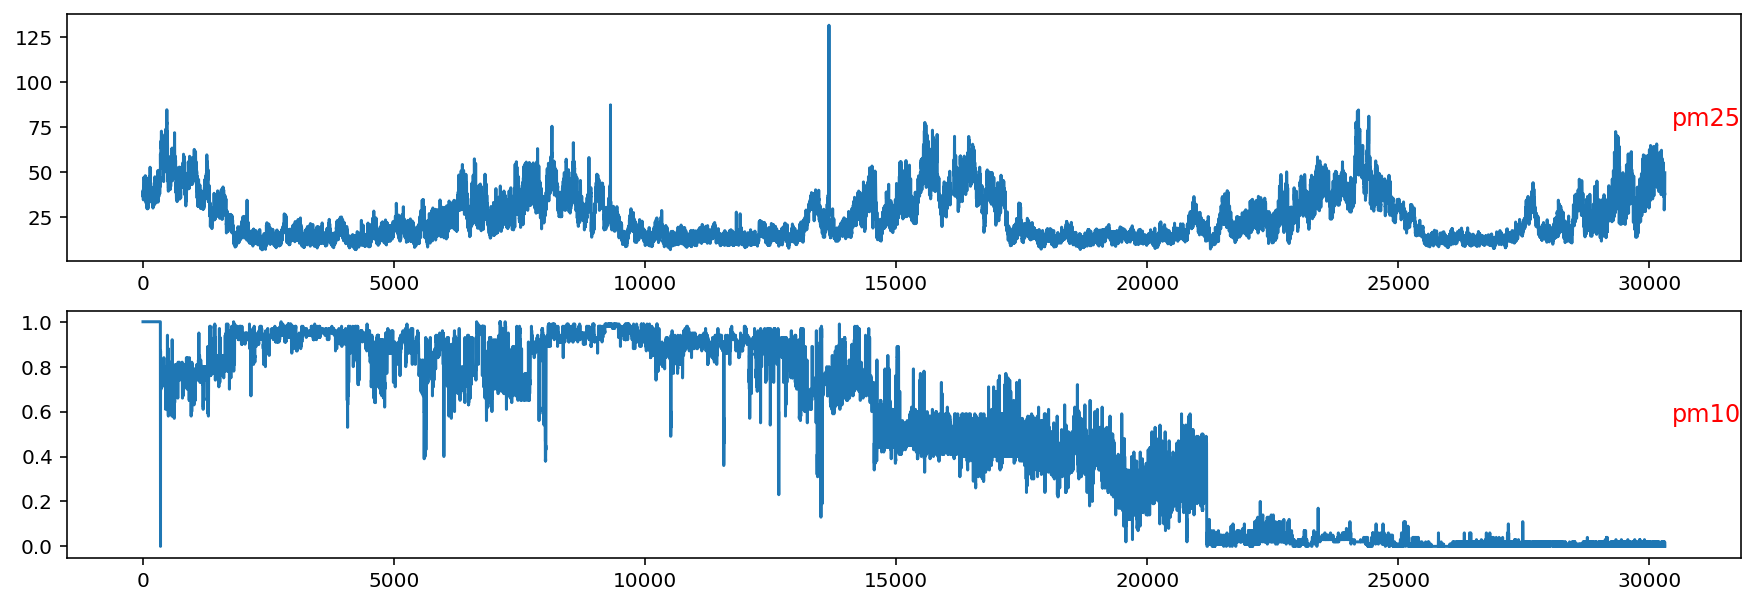

In [84]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('D:/Python_machine learning/PM25/ThailandPM25NEW.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0,1]
i = 1
# plot each column
#plt.figure(figsize=(15, 5))
pyplot.figure(figsize=(15, 5))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right', color='red')
	i += 1
pyplot.show()

In [85]:
dataset

pm25  pm10  retrospective
date                                           
2016-03-04 09:00:00  39.44  1.00              0
2016-03-04 10:00:00  36.34  1.00              0
2016-03-04 11:00:00  38.02  1.00              0
2016-03-04 12:00:00  37.83  1.00              0
2016-03-04 13:00:00  39.54  1.00              0
...                    ...   ...            ...
2020-01-25 20:00:00  38.53  0.00              0
2020-01-25 22:00:00  38.06  0.02              0
2020-01-26 00:00:00  37.30  0.01              0
2020-01-26 02:00:00  40.94  0.00              0
2020-01-26 04:00:00  49.68  0.00              0

[30310 rows x 3 columns]

In [86]:
#https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial
#https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial

In [90]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [91]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('D:/Python_machine learning/PM25/Thailand.csv',  parse_dates = [['year','month','day','hour']], index_col=0, date_parser=parse)
#dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pm25', 'pm10', 'retrospective']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pm25'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
#dataset.to_csv('D:/Python_machine learning/PM25/ThailandPM25NEW.csv')

                      pm25  pm10  retrospective
date                                           
2016-03-04 09:00:00  39.44   1.0              0
2016-03-04 10:00:00  36.34   1.0              0
2016-03-04 11:00:00  38.02   1.0              0
2016-03-04 12:00:00  37.83   1.0              0
2016-03-04 13:00:00  39.54   1.0              0


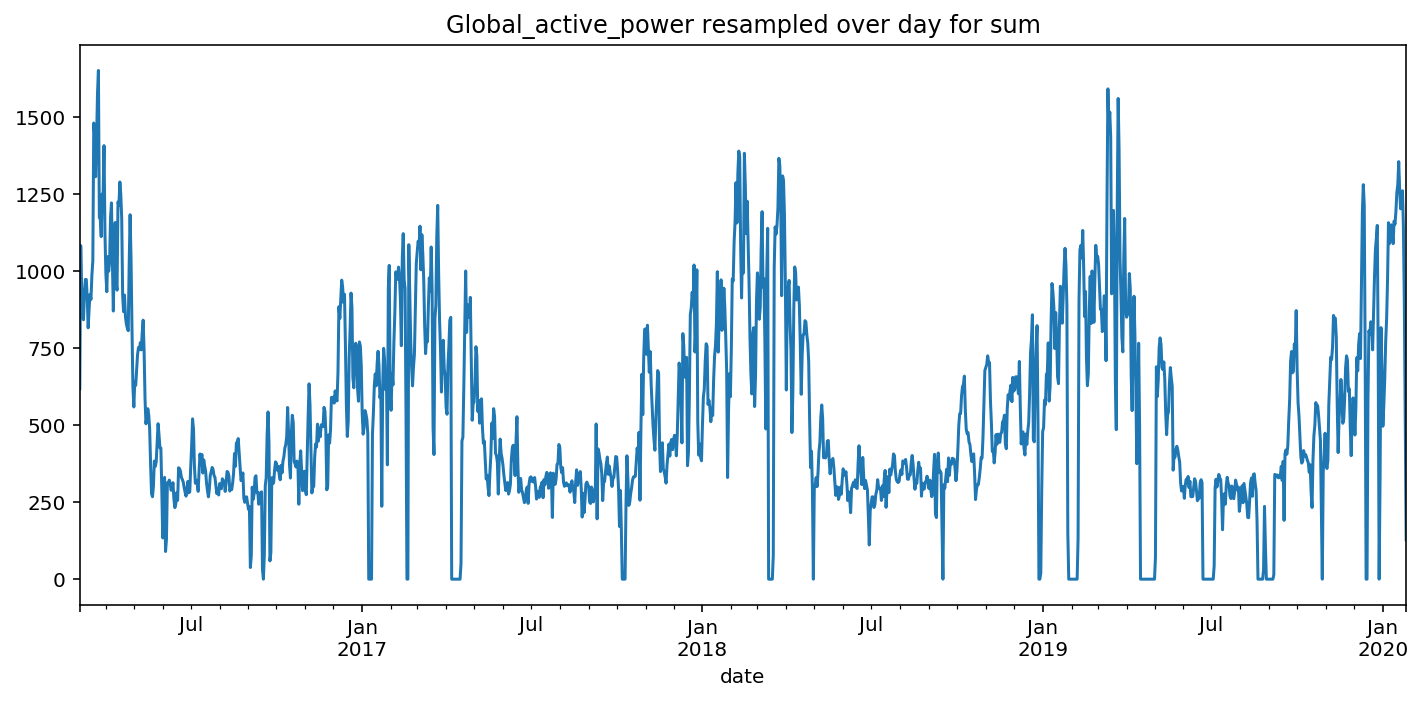

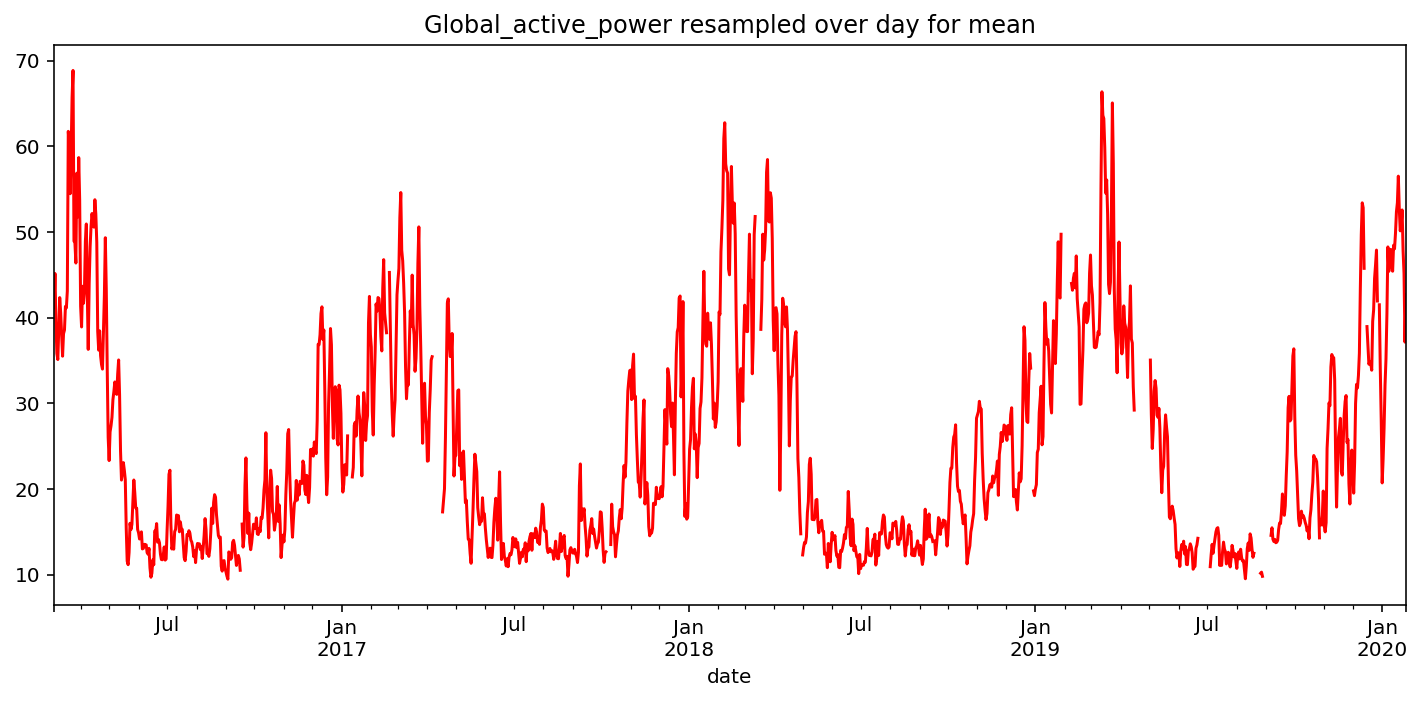

In [92]:
dataset.pm25.resample('D').sum().plot(title='Global_active_power resampled over day for sum', figsize=(10,5)) 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

dataset.pm25.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red', figsize=(10,5)) 
plt.tight_layout()
plt.show()

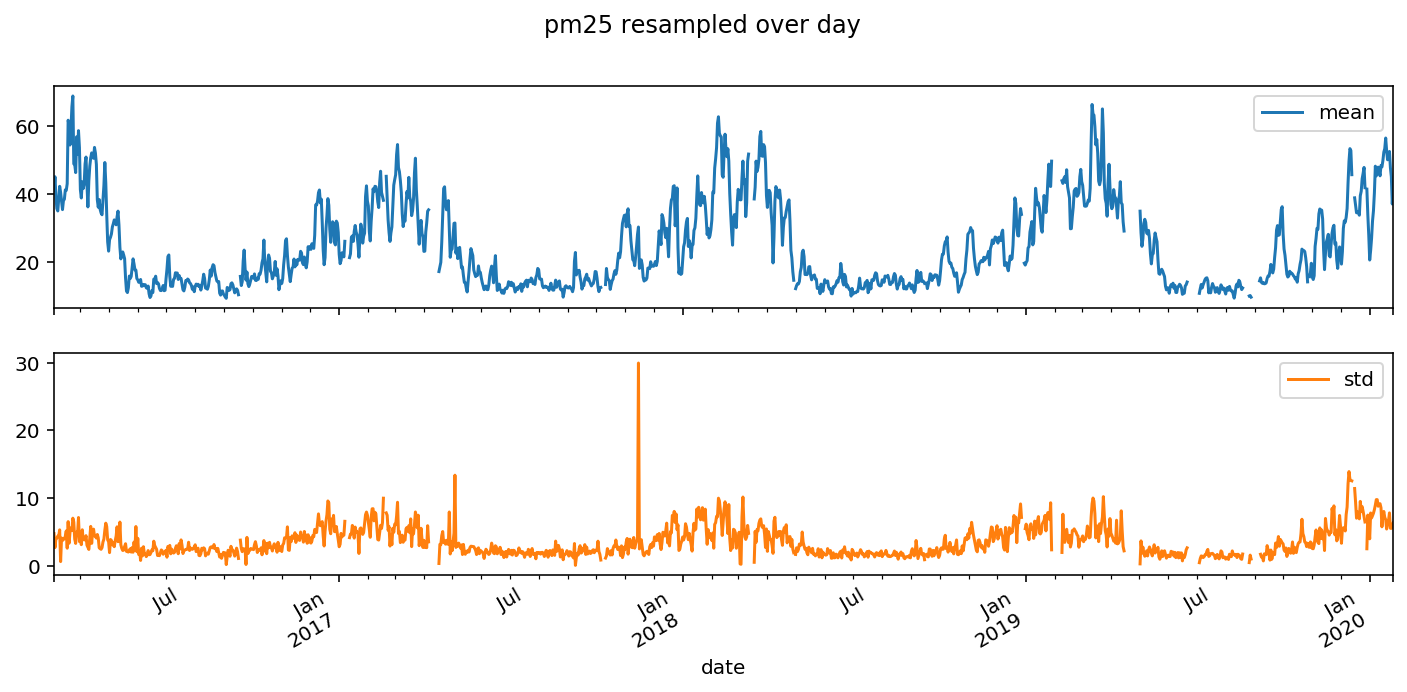

In [93]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = dataset.pm25.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='pm25 resampled over day', figsize=(12,5))
plt.show()

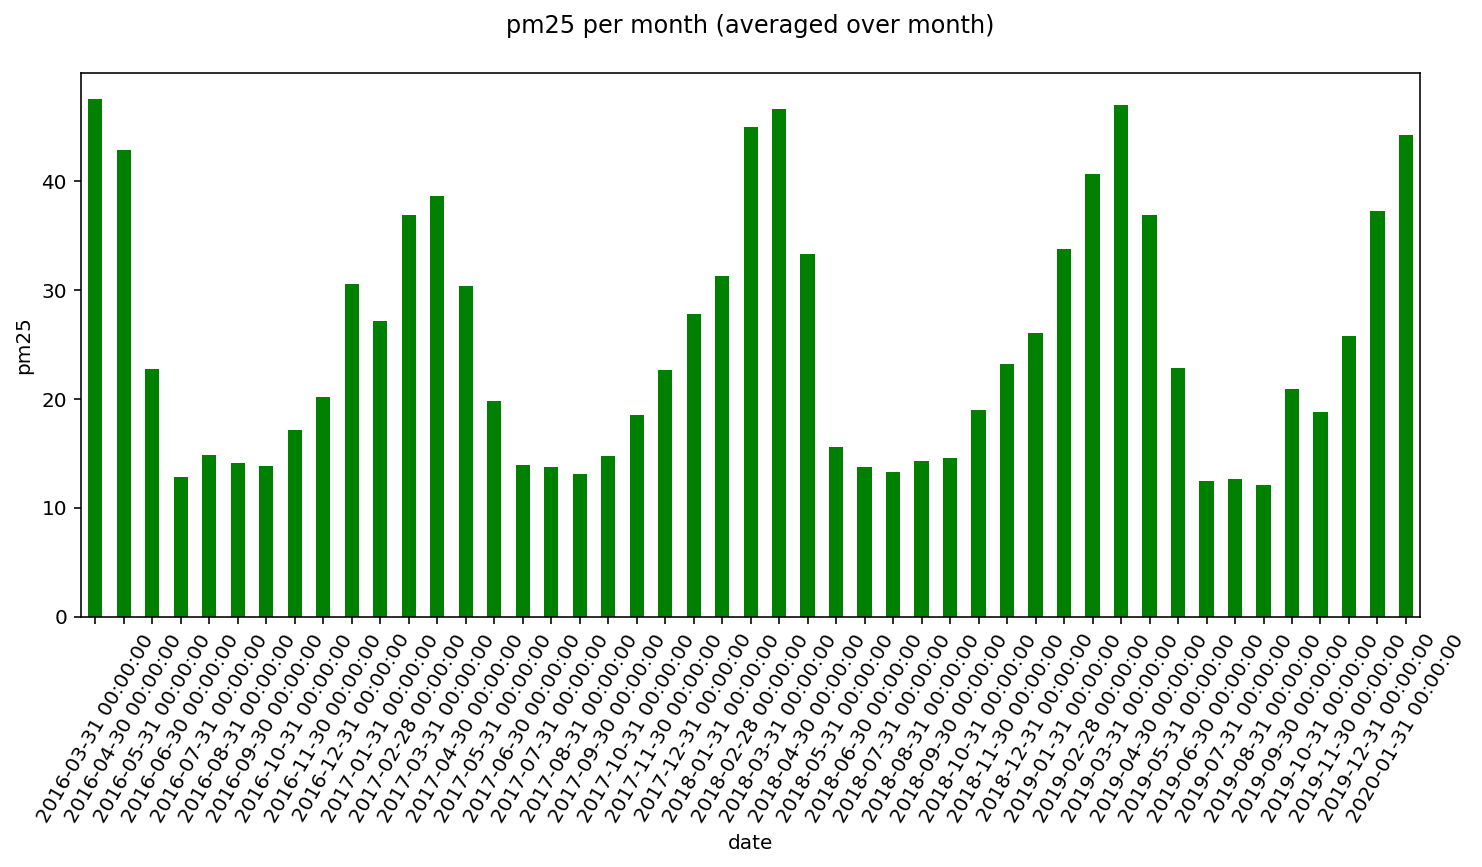

In [94]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
dataset['pm25'].resample('M').mean().plot(kind='bar', color='green', figsize=(12,5))
plt.xticks(rotation=60)
plt.ylabel('pm25')
plt.title('pm25 per month (averaged over month)\n')
plt.show()

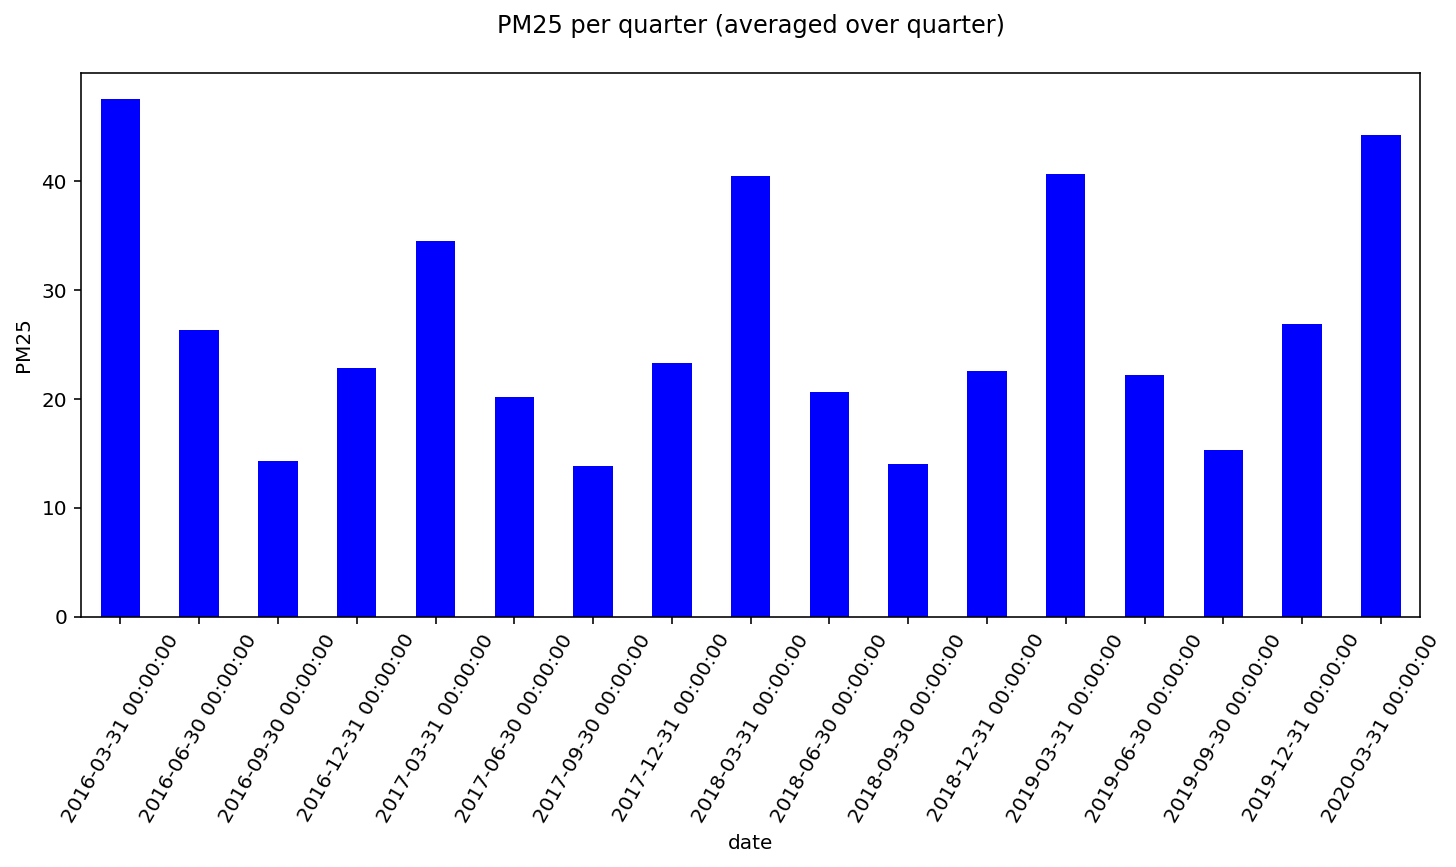

In [95]:
## Mean of 'Global_active_power' resampled over quarter
dataset['pm25'].resample('Q').mean().plot(kind='bar', color='blue', figsize=(12,5))
plt.xticks(rotation=60)
plt.ylabel('PM25')
plt.title('PM25 per quarter (averaged over quarter)\n')
plt.show()

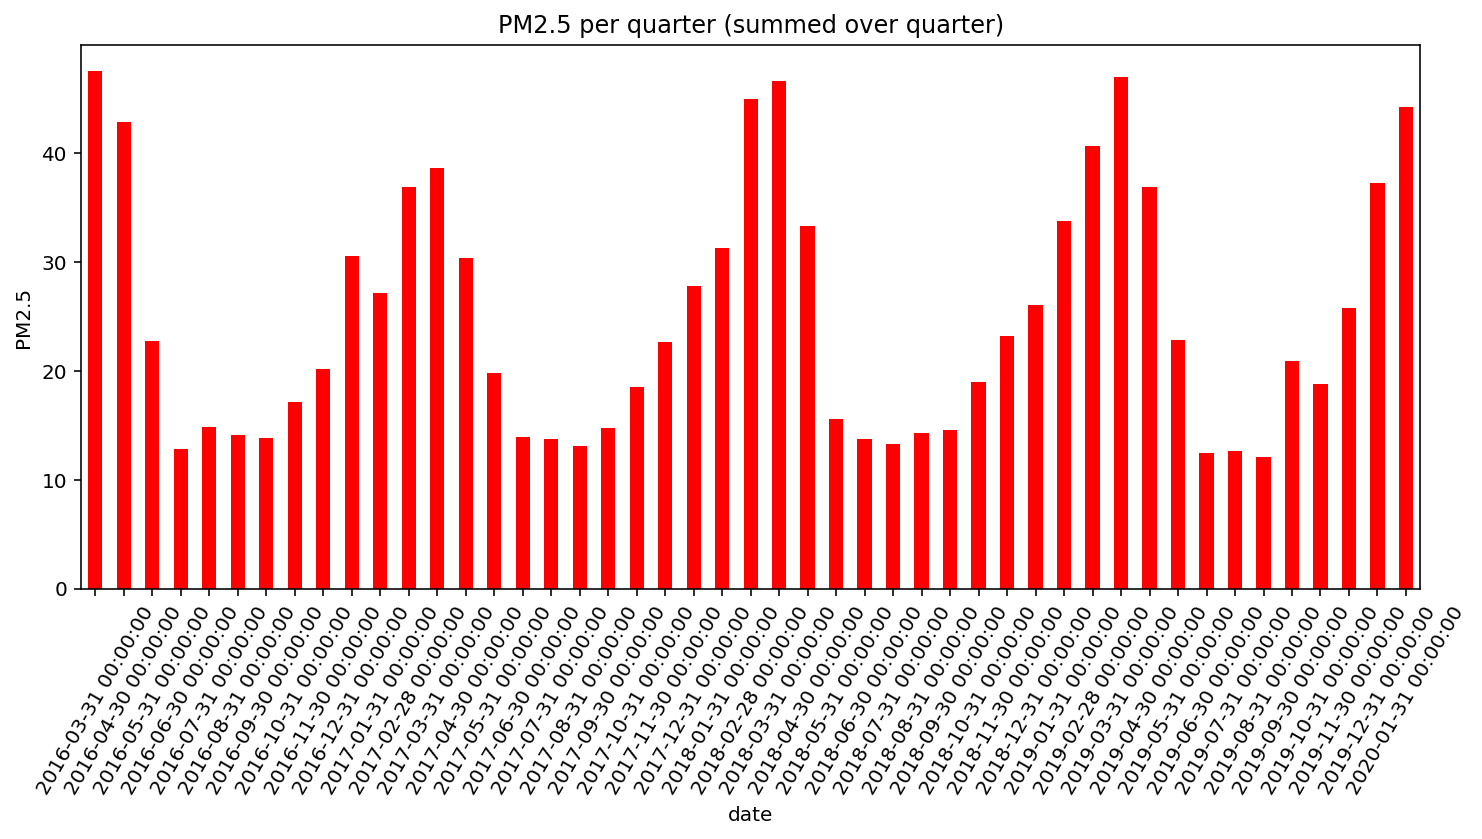

In [96]:
## mean of 'Voltage' resampled over month
dataset['pm25'].resample('M').mean().plot(kind='bar', color='red',figsize=(12,5))
plt.xticks(rotation=60)
plt.ylabel('PM2.5')
plt.title('PM2.5 per quarter (summed over quarter)')
plt.show()

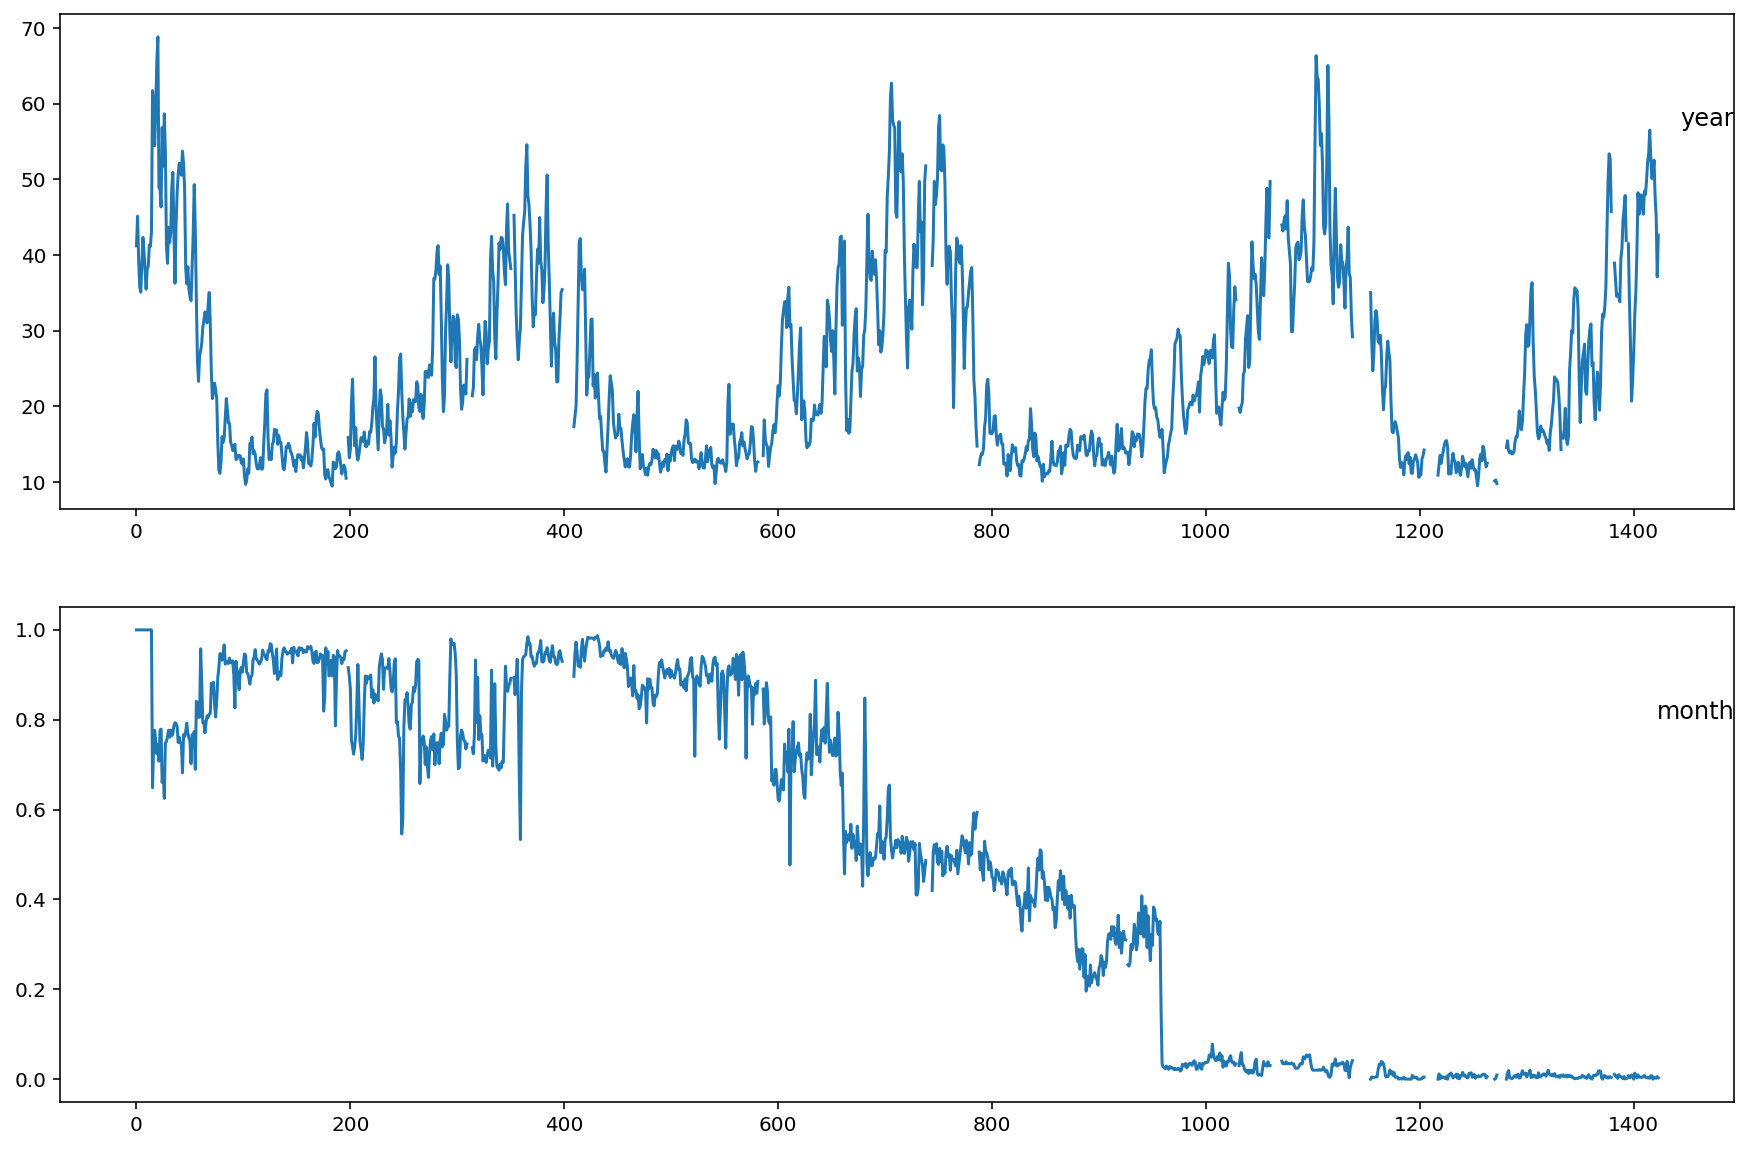

In [97]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1]
i = 1
groups=cols
values = dataset.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

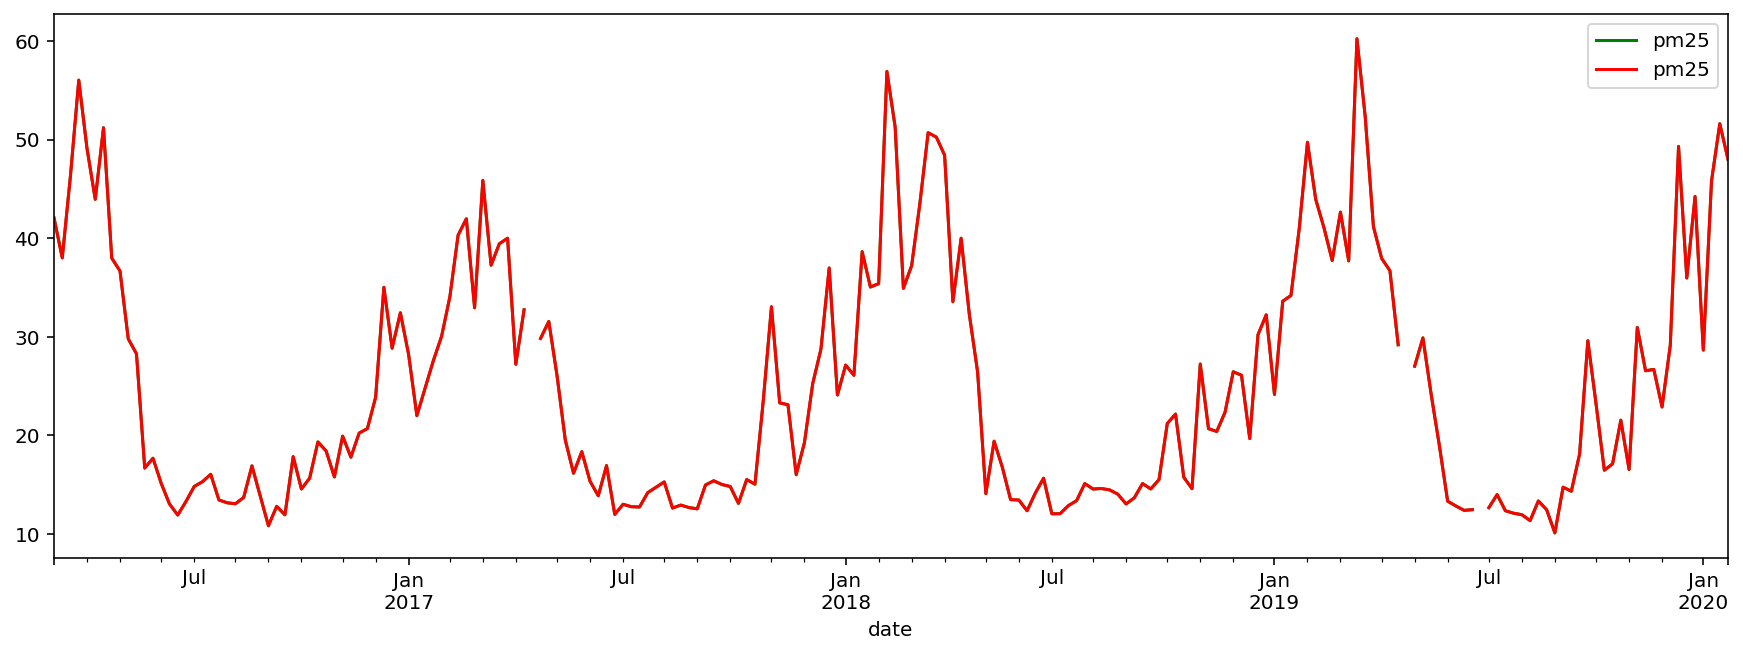

In [98]:
## resampling over week and computing mean
dataset.pm25.resample('W').mean().plot(color='g', legend=True, figsize=(15,5))
dataset.pm25.resample('W').mean().plot(color='r', legend=True, figsize=(15,5))
#dataset.pm10_mask.resample('W').mean().plot(color='b', legend=True)
#dataset.pm10_mask.resample('W').mean().plot(color='g', legend=True)
plt.show()

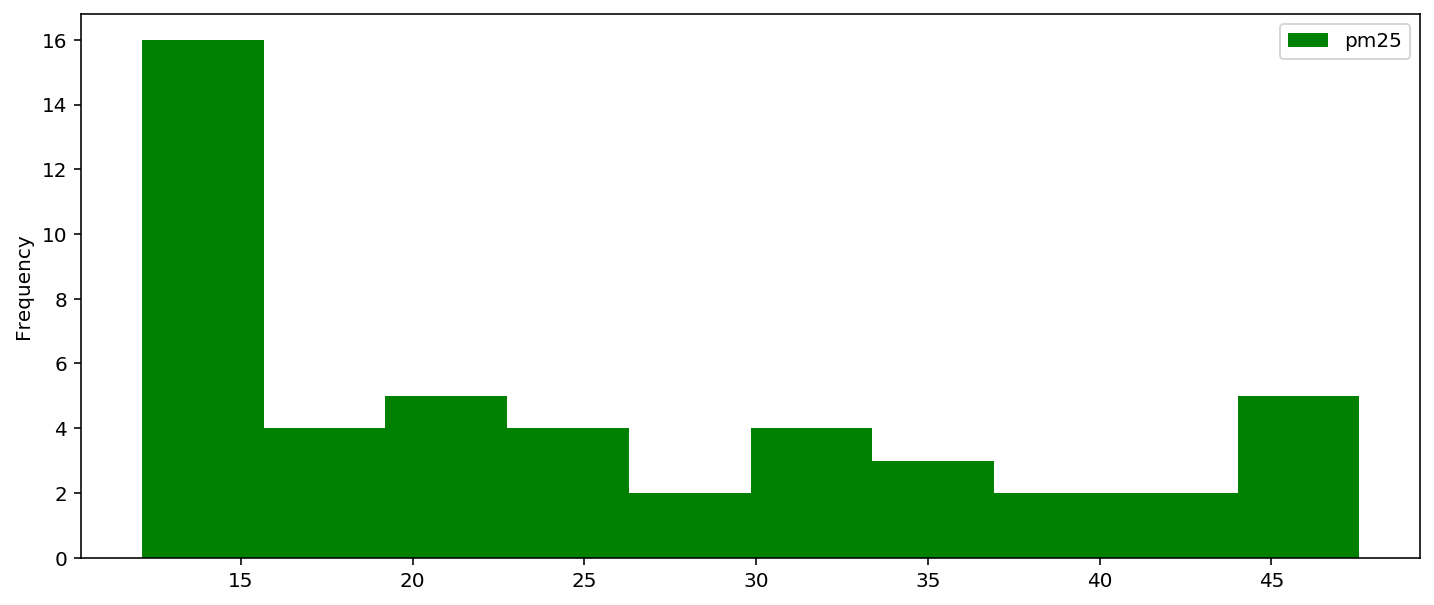

In [99]:
# Below I show hist plot of the mean of different feature resampled over month 
dataset.pm25.resample('M').mean().plot(kind='hist', color='g', legend=True, figsize=(12,5))
#df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
#df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
#df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

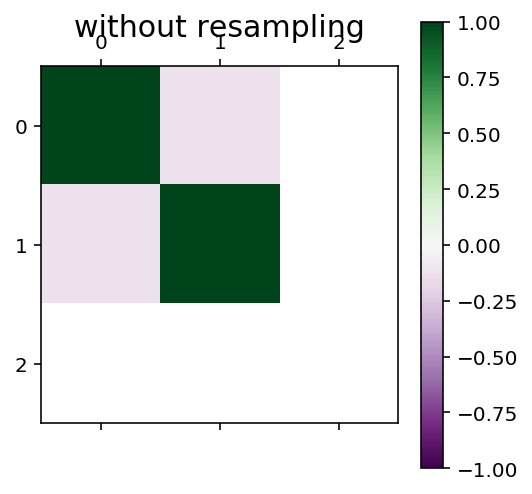

In [100]:
# Correlations among columns
plt.matshow(dataset.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

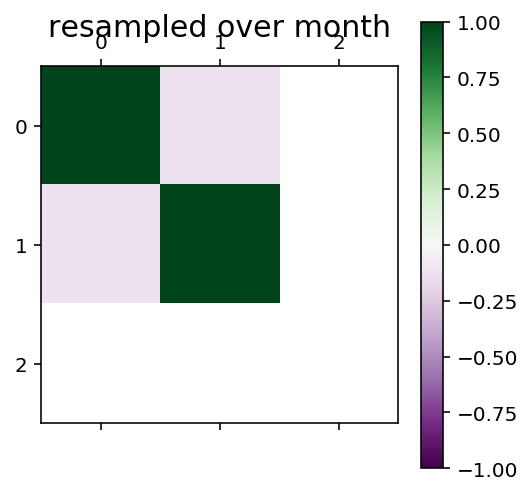

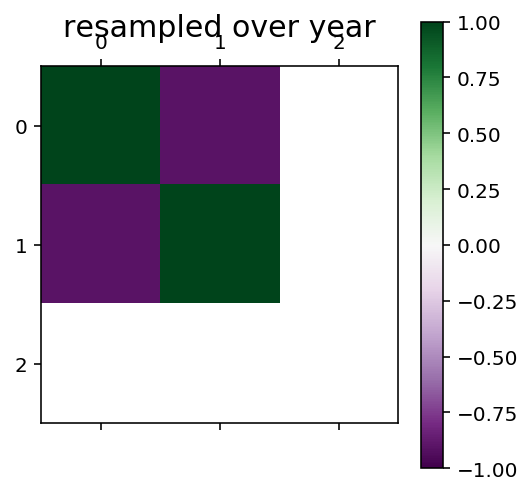

In [101]:
# Correlations of mean of features resampled over months


plt.matshow(dataset.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(dataset.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

## Machine-Leaning: LSTM Data Preparation and feature engineering

In [130]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [131]:
## resampling of data over hour
df_resample = dataset.resample('h').mean() 
df_resample.shape

(34148, 3)

In [132]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.261072        1.0        0.0  0.236200
2   0.236200        1.0        0.0  0.249679
3   0.249679        1.0        0.0  0.248155
4   0.248155        1.0        0.0  0.261874
5   0.261874        1.0        0.0  0.251203


In [133]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 3) (8760,) (20896, 1, 3) (20896,)


In [134]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#model.add(LSTM(70))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               41600     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________
Train on 8760 samples, validate on 20896 samples
Epoch 1/10
 - 2s - loss: 0.0153 - val_loss: 0.0123
Epoch 2/10
 - 1s - loss: 0.0075 - val_loss: 0.0105
Epoch 3/10
 - 1s - loss: 0.0058 - val_loss: 0.0089
Epoch 4/10
 - 1s - loss: 0.0045 - val_loss: 0.0074
Epoch 5/10
 - 1s - loss: 0.0034 - val_loss: 0.0062
Epoch 6/10
 - 1s - loss: 0.0024 - val_loss: 0.0051
Epoch 7/10
 - 1s - loss: 

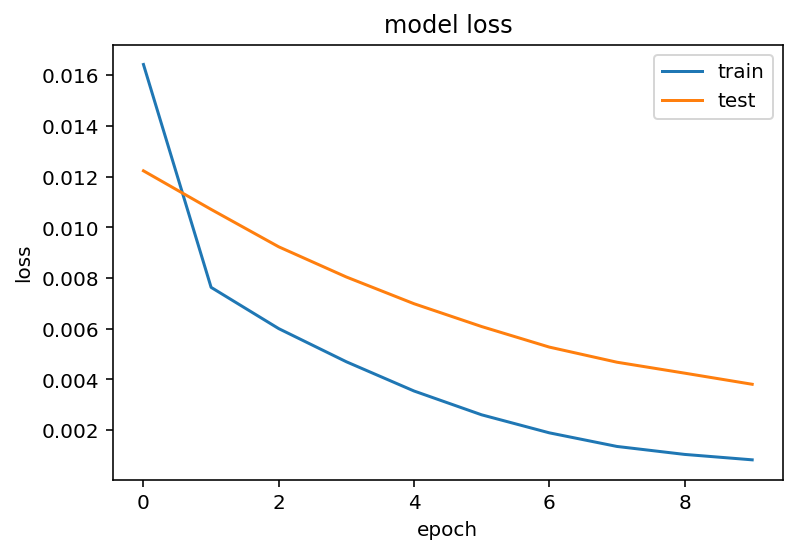

In [125]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [128]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -2:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 3))
inv_y = np.concatenate((test_y, test_X[:, -2:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: Error when checking input: expected lstm_9_input to have 3 dimensions, but got array with shape (20896, 3)

In [121]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

NameError: name 'inv_y' is not defined

In [129]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn import metrics
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE and MAE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#print('Test MAE:',metrics.mean_absolute_error(inv_y, inv_yhat))

print('R Square using built-in function:', r2_score(inv_y, inv_yhat))
print('Mean Absolute Error:', mean_absolute_error(inv_y, inv_yhat))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(inv_y, inv_yhat)))

ValueError: Error when checking input: expected lstm_9_input to have 3 dimensions, but got array with shape (20896, 3)

## Multivariate LSTM Forecast Model

In [135]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [140]:
# convert series to supervised learning
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else dataset.shape[1]
	df = DataFrame(dataset)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('D:/Python_machine learning/PM25/pollution.csv', header=0, index_col=0)

values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
#print(reframed.head())
reframed

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [138]:
dataset

year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  Is  Ir
No                                                                           
1      2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   0   0
2      2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   0   0
3      2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   0   0
4      2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   0   0
5      2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   0   0
...     ...    ...  ...   ...    ...   ...   ...     ...  ...     ...  ..  ..
43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   0   0
43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   0   0
43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   0   0
43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   0   0
43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   0   0

[43824 rows x 12 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28685 entries, 2016-03-04 09:00:00 to 2019-11-11 03:00:00
Data columns (total 3 columns):
PM25          28685 non-null float64
PM10_mask     28685 non-null int64
Respective    28685 non-null int64
dtypes: float64(1), int64(2)
memory usage: 896.4 KB


In [45]:
df.dtypes

PM25          float64
PM10_mask       int64
Respective      int64
dtype: object

In [46]:
df.shape

(28685, 3)

In [47]:
df.describe().T

count       mean        std  min   25%   50%   75%    max
PM25        28685.0  27.490225  23.067688  1.3  12.4  18.8  34.1  203.8
PM10_mask   28685.0   0.102214   0.302934  0.0   0.0   0.0   0.0    1.0
Respective  28685.0   0.000000   0.000000  0.0   0.0   0.0   0.0    0.0

In [48]:
df.columns

Index(['PM25', 'PM10_mask', 'Respective'], dtype='object')

## Dealing with missing values 'nan' with a test statistic

In [49]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,3):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[]

In [50]:
# filling nan with mean in any columns

for j in range(0,3):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

## Data visualization

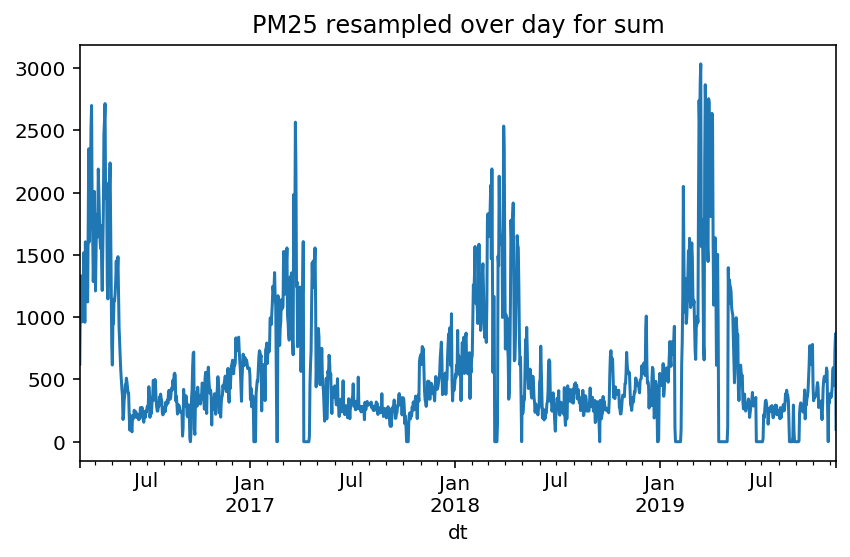

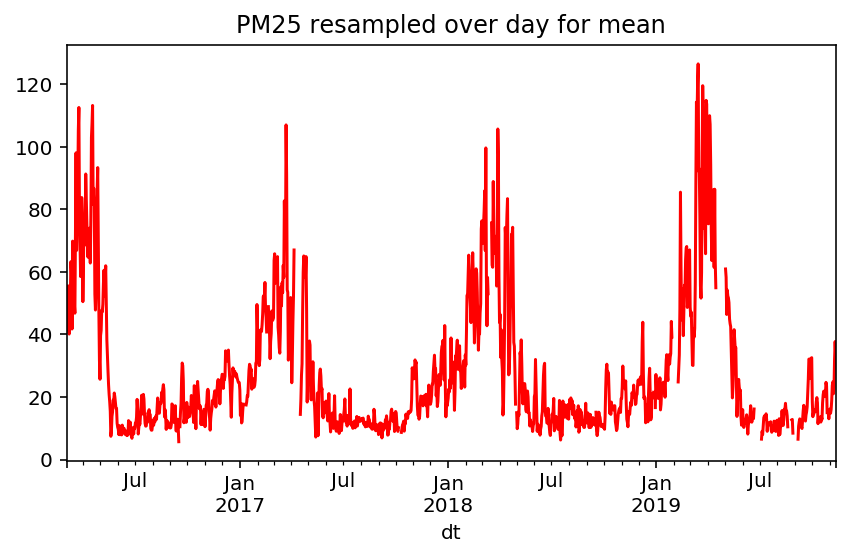

In [51]:
df.PM25.resample('D').sum().plot(title='PM25 resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.PM25.resample('D').mean().plot(title='PM25 resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

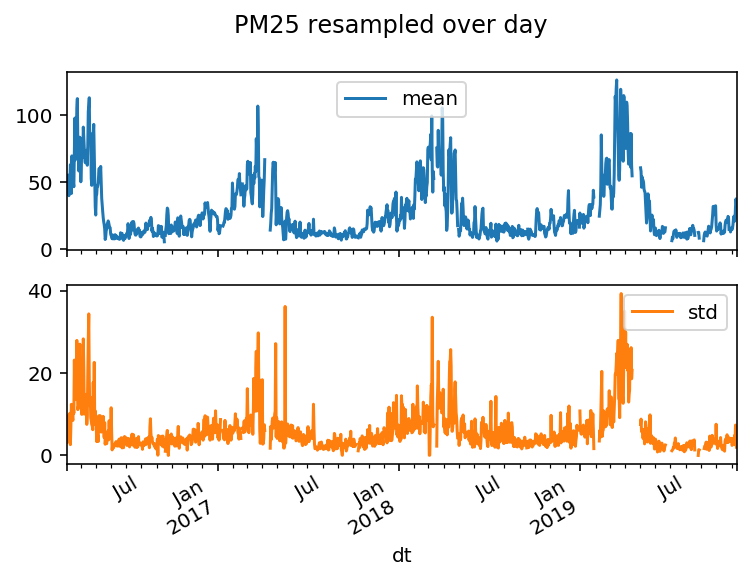

In [52]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.PM25.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='PM25 resampled over day')
plt.show()

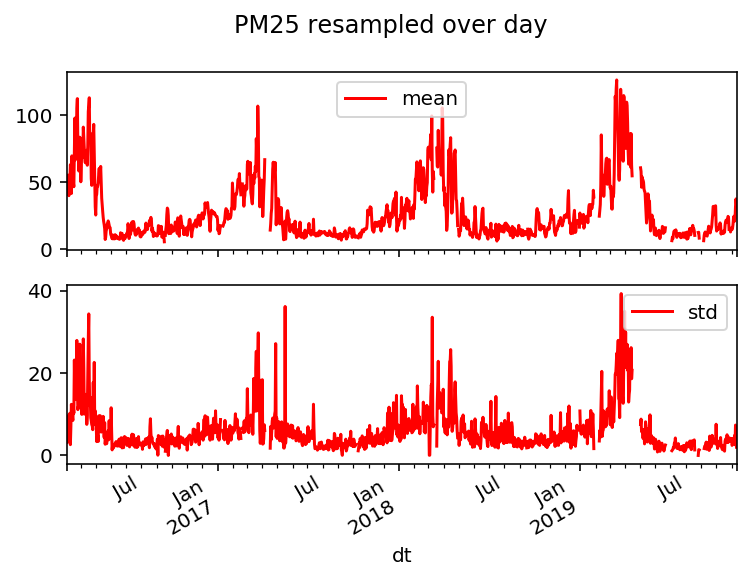

In [53]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.PM25.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='PM25 resampled over day', color='red')
plt.show()

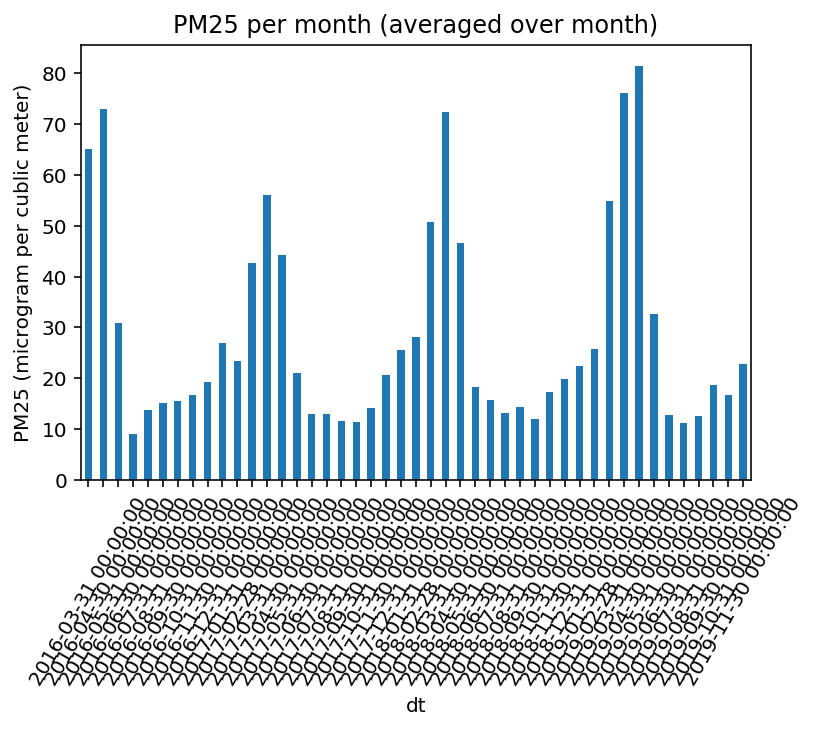

In [54]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
df['PM25'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('PM25 (microgram per cublic meter)')
plt.title('PM25 per month (averaged over month)')
plt.show()

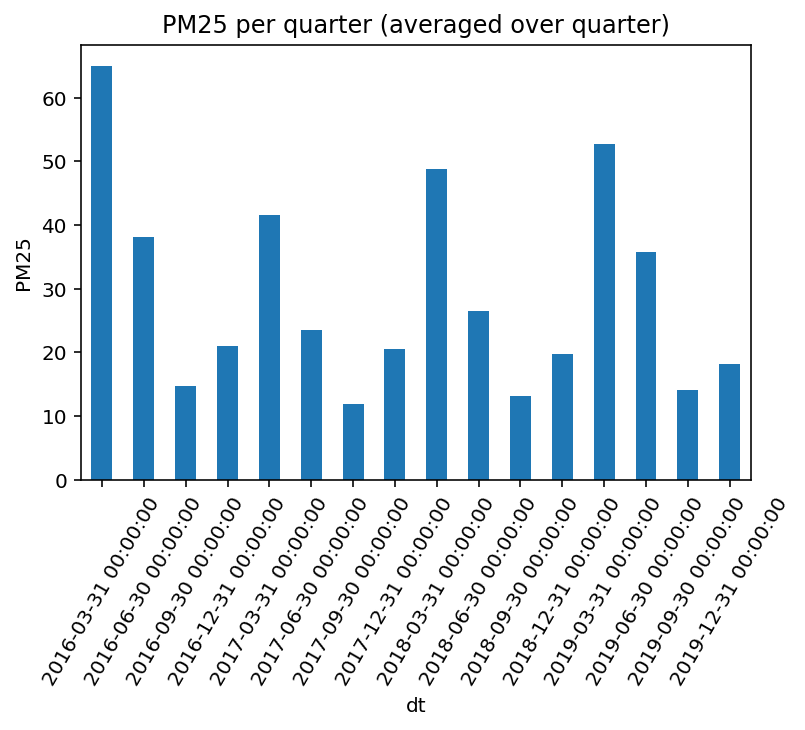

In [55]:
## Mean of 'Global_active_power' resampled over quarter
df['PM25'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('PM25')
plt.title('PM25 per quarter (averaged over quarter)')
plt.show()

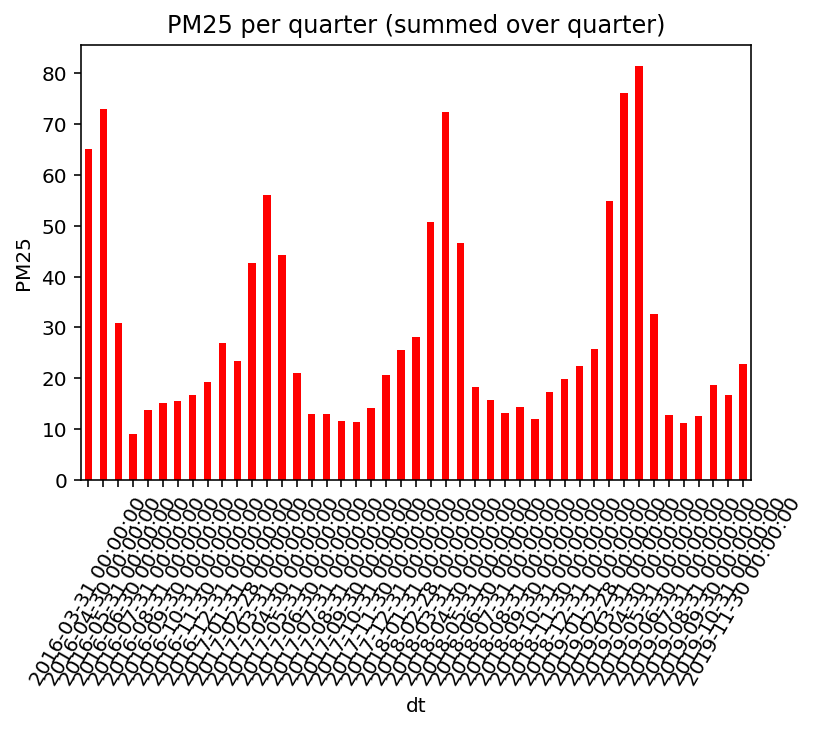

In [56]:
## mean of 'Voltage' resampled over month
df['PM25'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('PM25')
plt.title('PM25 per quarter (summed over quarter)')
plt.show()

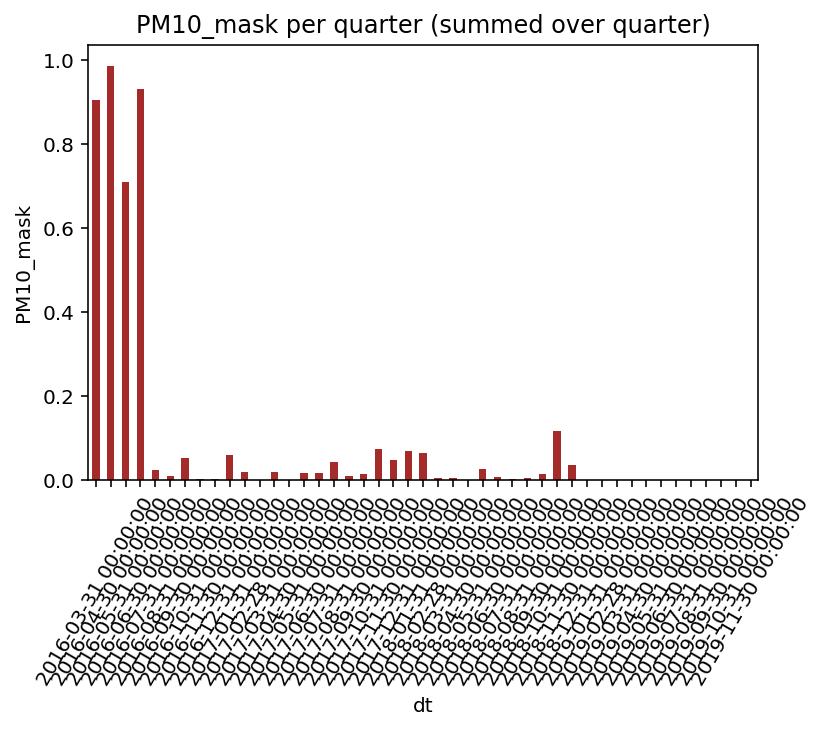

In [57]:
df['PM10_mask'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('PM10_mask')
plt.title('PM10_mask per quarter (summed over quarter)')
plt.show()

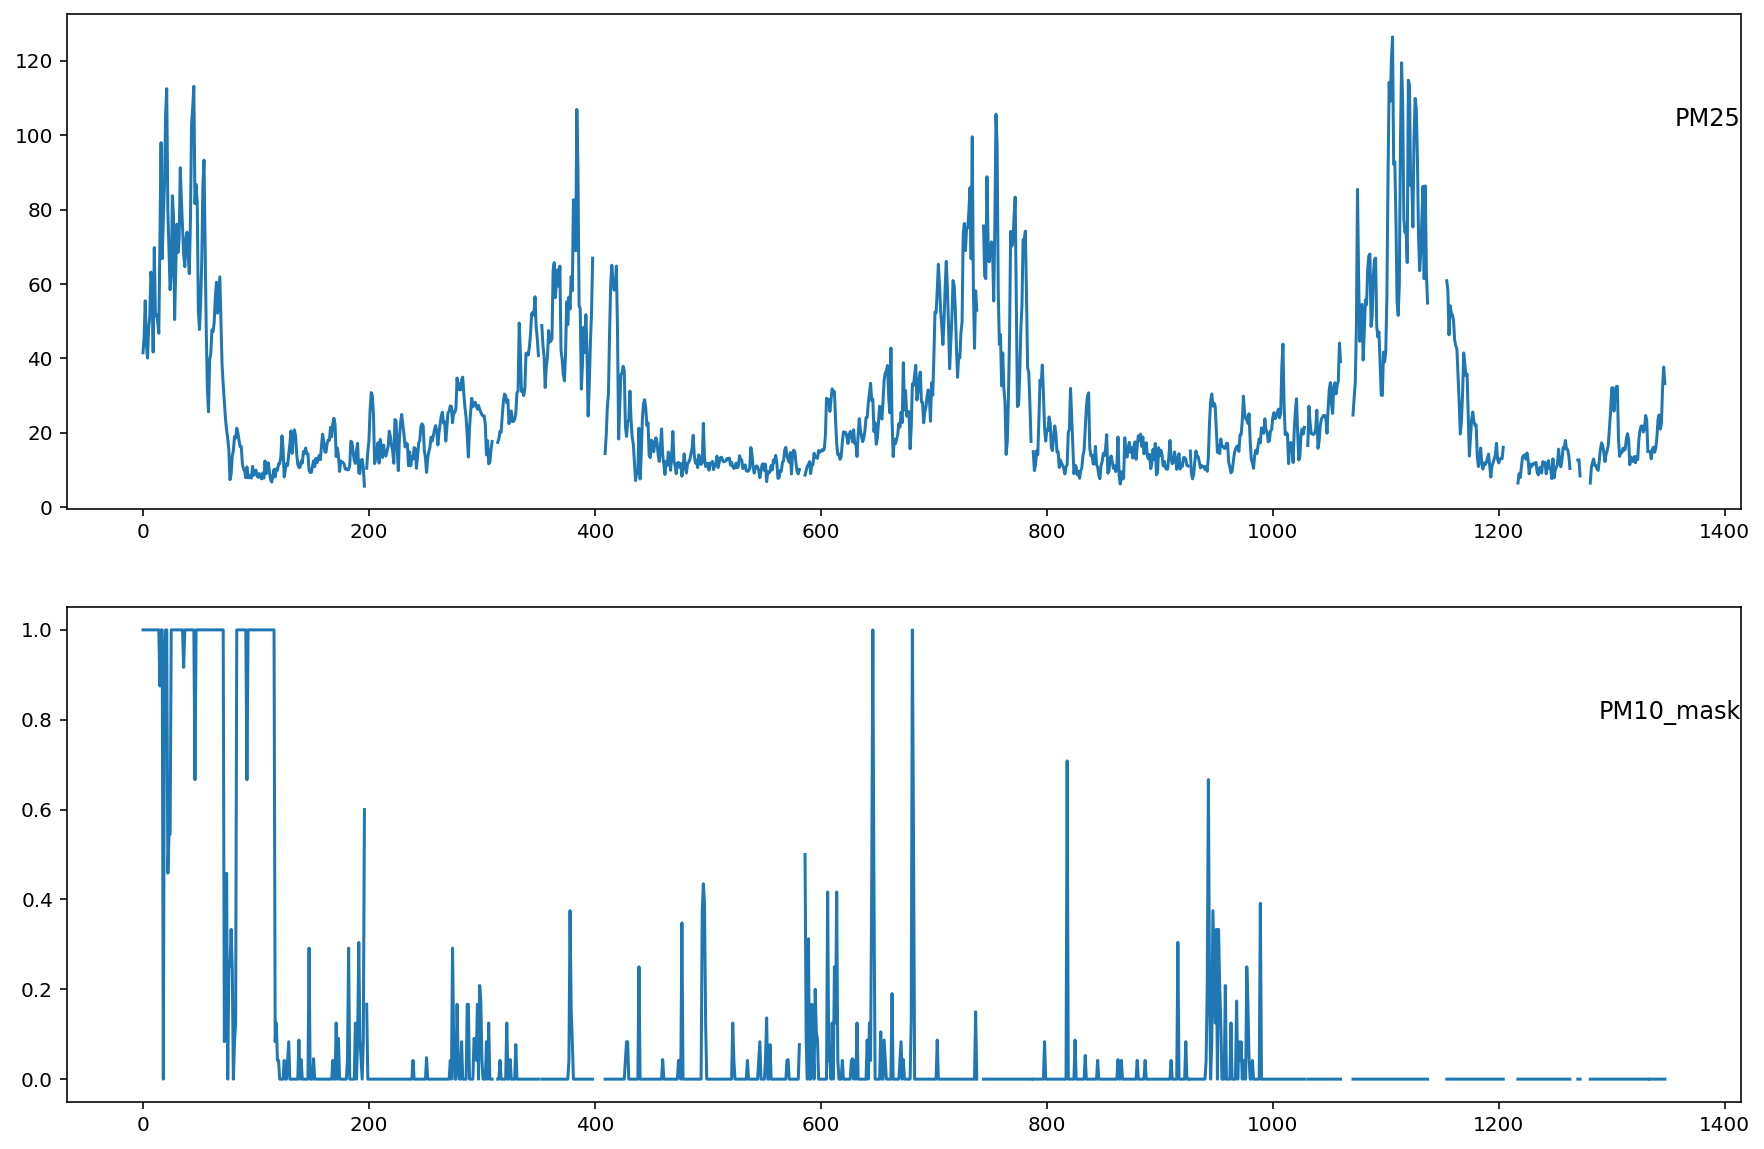

In [58]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

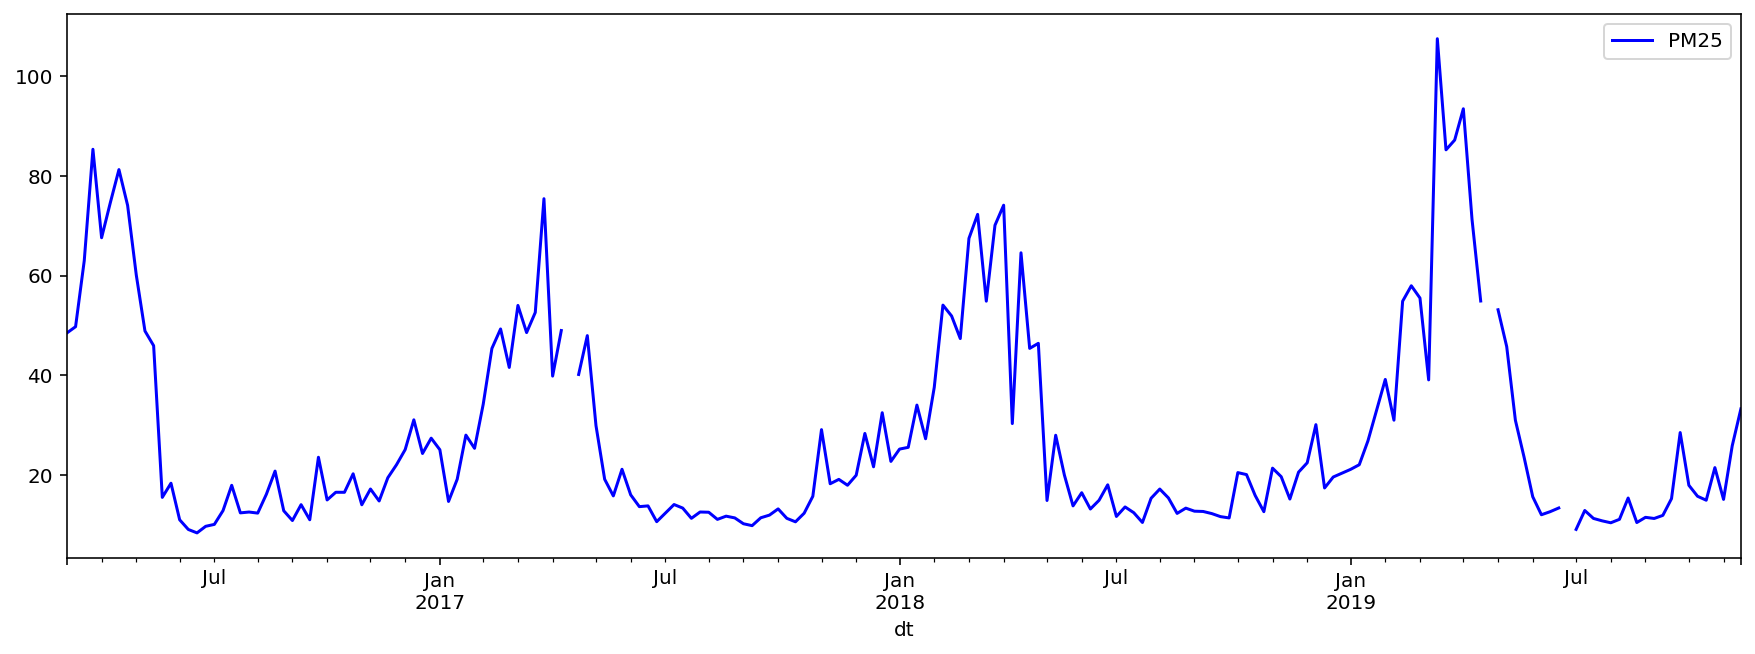

In [59]:
## resampling over week and computing mean
df.PM25.resample('W').mean().plot(color='b', legend=True, figsize=(15, 5))
#df.PM10_mask.resample('W').mean().plot(color='r', legend=True)
plt.show()

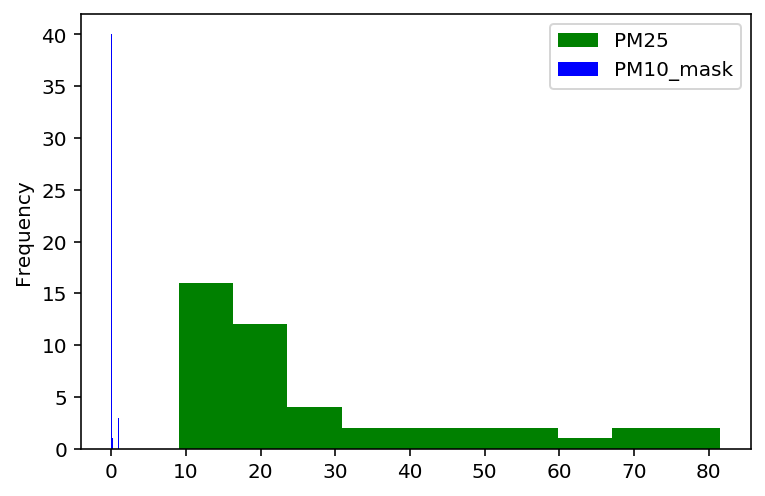

In [60]:
# Below I show hist plot of the mean of different feature resampled over month 
df.PM25.resample('M').mean().plot(kind='hist', color='g', legend=True )
df.PM10_mask.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
#df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
#df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

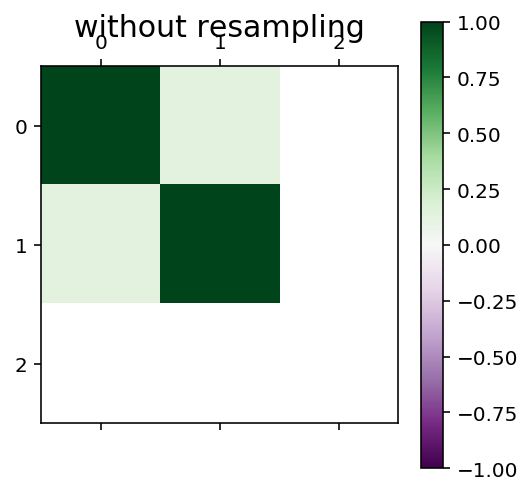

In [61]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

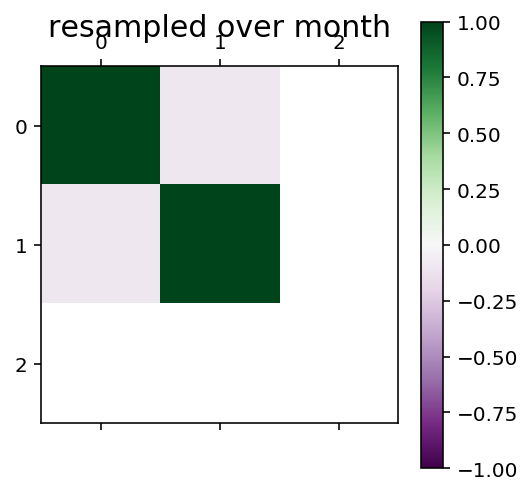

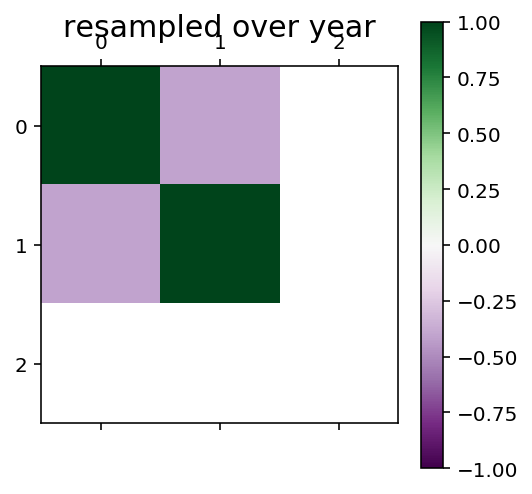

In [62]:
# Correlations of mean of features resampled over months


plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

## Machine-Leaning: LSTM Data Preparation and feature engineering

In [63]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [64]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(32323, 3)

In [65]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
#reframed.drop(reframed.columns[[4, 5]], axis=1, inplace=True)
#print(reframed.head())

In [66]:
reframed

var1(t-1)  var2(t-1)  var3(t-1)   var1(t)  var2(t)  var3(t)
1       0.190617        1.0        0.0  0.205432      1.0      0.0
2       0.205432        1.0        0.0  0.192099      1.0      0.0
3       0.192099        1.0        0.0  0.196049      1.0      0.0
4       0.196049        1.0        0.0  0.206420      1.0      0.0
5       0.206420        1.0        0.0  0.188642      1.0      0.0
...          ...        ...        ...       ...      ...      ...
32316   0.174321        0.0        0.0  0.164444      0.0      0.0
32317   0.164444        0.0        0.0  0.151111      0.0      0.0
32318   0.151111        0.0        0.0  0.153086      0.0      0.0
32321   0.147160        0.0        0.0  0.160000      0.0      0.0
32322   0.160000        0.0        0.0  0.166420      0.0      0.0

[27670 rows x 6 columns]

## Splitting the rest of data to train and validation sets

In [67]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 5) (8760,) (18910, 1, 5) (18910,)


In [68]:
test

array([[0.30024691, 0.        , 0.        , 0.2962963 , 0.        ,
        0.        ],
       [0.2962963 , 0.        , 0.        , 0.2854321 , 0.        ,
        0.        ],
       [0.2854321 , 0.        , 0.        , 0.27901235, 0.        ,
        0.        ],
       ...,
       [0.15111111, 0.        , 0.        , 0.15308642, 0.        ,
        0.        ],
       [0.14716049, 0.        , 0.        , 0.16      , 0.        ,
        0.        ],
       [0.16      , 0.        , 0.        , 0.16641975, 0.        ,
        0.        ]])

## Model architecture

Train on 8760 samples, validate on 18910 samples
Epoch 1/20
 - 1s - loss: 9.9915e-05 - val_loss: 2.7163e-07
Epoch 2/20
 - 1s - loss: 4.9399e-05 - val_loss: 5.7770e-07
Epoch 3/20
 - 1s - loss: 2.5495e-05 - val_loss: 1.1688e-06
Epoch 4/20
 - 1s - loss: 1.4997e-05 - val_loss: 7.4207e-08
Epoch 5/20
 - 1s - loss: 1.0030e-05 - val_loss: 5.7154e-07
Epoch 6/20
 - 1s - loss: 6.9888e-06 - val_loss: 1.5118e-07
Epoch 7/20
 - 1s - loss: 4.9898e-06 - val_loss: 1.8837e-08
Epoch 8/20
 - 1s - loss: 3.9474e-06 - val_loss: 2.4920e-07
Epoch 9/20
 - 1s - loss: 2.9570e-06 - val_loss: 6.1933e-08
Epoch 10/20
 - 1s - loss: 2.2894e-06 - val_loss: 1.4508e-08
Epoch 11/20
 - 1s - loss: 1.7817e-06 - val_loss: 1.8077e-08
Epoch 12/20
 - 1s - loss: 1.5160e-06 - val_loss: 1.0081e-08
Epoch 13/20
 - 1s - loss: 1.0673e-06 - val_loss: 8.0701e-08
Epoch 14/20
 - 1s - loss: 1.0835e-06 - val_loss: 1.6834e-08
Epoch 15/20
 - 1s - loss: 8.6345e-07 - val_loss: 4.1296e-08
Epoch 16/20
 - 1s - loss: 7.5466e-07 - val_loss: 1.2812e-08


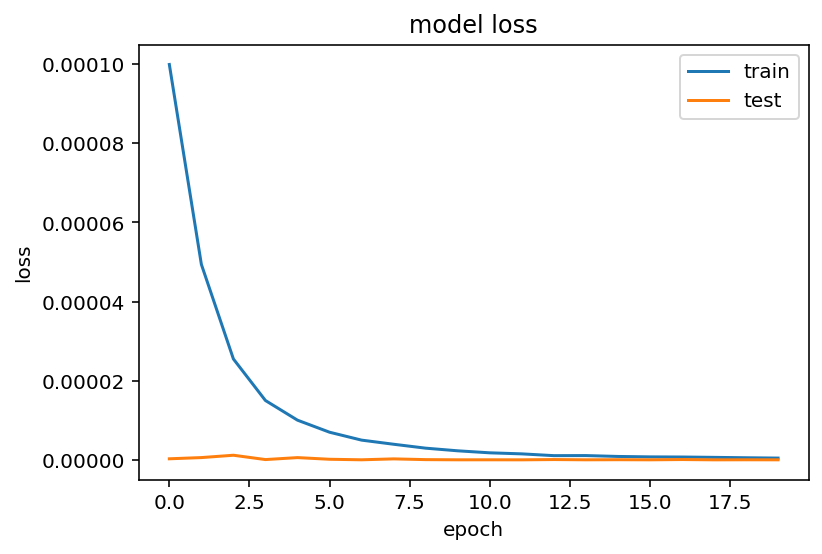

ValueError: cannot reshape array of size 94550 into shape (18910,3)

In [69]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 3))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -2:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -2:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate R Square, MAE, and RMSE
#rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
#print('Test RMSE: %.3f' % rmse)
#print('Test MAE:',metrics.mean_absolute_error(inv_y, inv_yhat))
print('R Square using built-in function:', r2_score(inv_y, inv_yhat))
print('Mean Absolute Error:', mean_absolute_error(inv_y, inv_yhat))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(inv_y, inv_yhat)))



In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('PM25', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

NameError: name 'inv_y' is not defined

In [71]:
yhat.shape

(18910, 1)

In [53]:
from pandas import DataFrame
# define the sequence
df = DataFrame()
df['t'] = [x for x in range(10)]
# shift backward
df['t+1'] = df['t'].shift(-1)
print(df)

   t  t+1
0  0  1.0
1  1  2.0
2  2  3.0
3  3  4.0
4  4  5.0
5  5  6.0
6  6  7.0
7  7  8.0
8  8  9.0
9  9  NaN


In [73]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [74]:
data

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [75]:
data = data.reshape((1, 10, 1))

In [76]:
data

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]]])

In [77]:
print(data.shape)

(1, 10, 1)


In [78]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 10, 1))
print(data.shape)

(1, 10, 1)


In [81]:
model = Sequential()
model.add(LSTM(32, input_shape=(10, 1)))

In [82]:
series 1: 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
series 2: 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1

SyntaxError: invalid syntax (<ipython-input-82-11e637537574>, line 1)

In [88]:
from numpy import array
data = array([
[0.1, 1.0],
[0.2, 0.9],
[0.3, 0.8],
[0.4, 0.7],
[0.5, 0.6],
[0.6, 0.5],
[0.7, 0.4],
[0.8, 0.3],
[0.9, 0.2],
[1.0, 0.1]])

In [89]:
data = data.reshape(1, 10, 2)
print(data.shape)

(1, 10, 2)


In [90]:
model = Sequential()
model.add(LSTM(32, input_shape=(10, 2)))

In [95]:
# generate a sequence of random numbers in [0, n_features)
def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]

In [101]:
# one hot encode sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

In [97]:
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [98]:
from random import randint
from numpy import array
from numpy import argmax
# generate a sequence of random numbers in [0, n_features)
def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]
# one hot encode sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]
# generate random sequence
sequence = generate_sequence(25, 100)
print(sequence)
# one hot encode
encoded = one_hot_encode(sequence, 100)
print(encoded)
# one hot decode
decoded = one_hot_decode(encoded)
print(decoded)

[99, 45, 54, 97, 77, 31, 76, 36, 51, 64, 45, 98, 26, 95, 76, 1, 86, 25, 71, 4, 37, 82, 90, 95, 39]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[99, 45, 54, 97, 77, 31, 76, 36, 51, 64, 45, 98, 26, 95, 76, 1, 86, 25, 71, 4, 37, 82, 90, 95, 39]


In [99]:
X = encoded.reshape(1, 25, 100)

In [100]:
X

array([[[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

In [103]:
# generate one example for an lstm
def generate_example(length, n_features, out_index):
    # generate sequence
    sequence = generate_sequence(length, n_features)
    # one hot encode
    encoded = one_hot_encode(sequence, n_features)
    # reshape sequence to be 3D
    X = encoded.reshape((1, length, n_features))
    # select output
    y = encoded[out_index].reshape(1, n_features)
    return X, y

In [104]:
from random import randint
from numpy import array
from numpy import argmax
# generate a sequence of random numbers in [0, n_features)
def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]
# one hot encode sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]
# generate one example for an lstm
def generate_example(length, n_features, out_index):
    # generate sequence
    sequence = generate_sequence(length, n_features)
    # one hot encode
    encoded = one_hot_encode(sequence, n_features)
    # reshape sequence to be 3D
    X = encoded.reshape((1, length, n_features))
    # select output
    y = encoded[out_index].reshape(1, n_features)
    return X, y
X, y = generate_example(25, 100, 2)
print(X.shape)
print(y.shape)

(1, 25, 100)
(1, 100)


In [106]:
# define model
length = 5
n_features = 10
out_index = 2
model = Sequential()
model.add(LSTM(25, input_shape=(length, n_features)))
model.add(Dense(n_features, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['acc'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 25)                3600      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
# fit model
for i in range(10000):
    X, y = generate_example(length, n_features, out_index)
    model.fit(X, y, epochs=1, verbose=2)

Epoch 1/1
 - 0s - loss: 2.3947 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3227 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2714 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3291 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4326 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3034 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2311 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3237 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3474 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2757 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1996 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3500 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3979 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2682 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4230 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2724 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2454 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3035 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4336 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3127 - acc: 0.0000e+00
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 2.1292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3104 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3315 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2621 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2287 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1213 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1767 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1802 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2746 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3336 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1891 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2847 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2157 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2285 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1416 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2431 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3037 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0813 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2097 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1924 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2848 - acc: 0.

Epoch 1/1
 - 0s - loss: 1.7892 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4903 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0162 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0556 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2962 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9690 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0792 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3184 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9857 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0986 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2577 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0369 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1856 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2385 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2330 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0592 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2103 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0580 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2393 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3769 - acc: 0.0000e+00
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 2.3883 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9796 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3095 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1404 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8497 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9398 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9729 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9872 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9423 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0905 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1187 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6679 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2521 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4931 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9131 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3705 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2414 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1341 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3171 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7326 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 2.0253 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9410 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8231 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6631 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4517 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3849 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1987 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5832 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8939 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9566 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9709 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0796 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8035 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3819 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9655 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0008 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0053 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1079 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4059 -

 - 0s - loss: 1.6538 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2281 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1039 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8537 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7455 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8867 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6577 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6459 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7424 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7253 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1646 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7177 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4883 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9461 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0619 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7704 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8851 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8795 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.337

Epoch 1/1
 - 0s - loss: 1.0340 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7002 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6288 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0045 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2579 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6433 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3613 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.2590 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5655 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0178 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0704 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5817 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9706 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1334 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1360 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6285 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3282 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5471 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0600 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9589 - acc: 0.0000e+00
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 2.4209 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3883 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9459 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6072 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7775 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8720 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9281 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5678 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8855 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7546 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0009 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0714 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9785 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7258 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6463 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0421 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0694 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2477 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4105 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6408 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 1.0311 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8695 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5055 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6037 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5696 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1951 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9256 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0607 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0610 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3121 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7203 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5982 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2666 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1836 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3613 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4617 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5652 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0237 - acc: 0.0000e+00
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 0.7979 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6388 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9494 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1994 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4894 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6481 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5394 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3231 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1574 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5984 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9571 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5545 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0835 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7792 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8874 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9500 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1101 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2430 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6064 - acc: 1.

Epoch 1/1
 - 0s - loss: 2.2126 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9221 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9409 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1118 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8379 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9052 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9895 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5525 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3588 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8178 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8623 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4713 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5976 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6221 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0825 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1714 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9670 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1054 - acc: 1.0000
Epoch 1

Epoch 1/1
 - 0s - loss: 1.8636 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7998 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4347 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8894 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6312 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3484 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7175 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3228 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3571 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6733 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5194 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6629 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3531 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0002 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9543 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1383 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6964 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1380 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7428 - acc: 0.0000e+00
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.1490 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2903 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8307 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3513 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2124 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6414 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2844 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8517 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1031 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2958 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0759 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8152 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7709 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1724 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3373 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7129 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9554 - acc: 1.0000
Epoch 1

Epoch 1/1
 - 0s - loss: 0.6583 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9503 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.6103 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7929 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3529 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1126 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2410 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3589 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3921 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1664 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4667 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5371 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8865 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2532 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1307 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5960 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7213 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9644 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9677 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3152 - acc: 0.0000e+00
Epo

Epoch 1/1
 - 0s - loss: 0.9921 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8247 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8831 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7819 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3716 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9009 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5802 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2296 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8202 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4548 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0111 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5656 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4882 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9117 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6750 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0648 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8894 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2599 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8137 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9946 - acc: 0.0000e+00
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 0.7522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4153 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4320 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5863 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0003 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2767 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3940 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9946 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3033 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3979 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8805 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3319 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2979 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5006 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6558 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6814 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1459 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1980 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9988 - acc: 0.0000e+00
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 0.8084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3448 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3567 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3236 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5154 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4492 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3602 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7421 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5006 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0689 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4090 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5900 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6021 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2694 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5879 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5373 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8278 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2

Epoch 1/1
 - 0s - loss: 1.8525 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2212 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7579 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2374 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3042 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8616 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2857 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0959 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3037 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7910 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7496 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3446 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1545 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6449 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5550 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2807 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7846 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0612 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7158 

Epoch 1/1
 - 0s - loss: 2.1450 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5868 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1435 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7010 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9544 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4555 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7566 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6690 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4712 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4228 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5751 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6460 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0125 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0731 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5976 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8989 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3679 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9585 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss:

Epoch 1/1
 - 0s - loss: 0.1471 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7813 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9514 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0022 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0443 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1813 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2074 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2629 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0993 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6782 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0215 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8627 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1000 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1360 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1924 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1242 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2382 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.0300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0744 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8767 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2647 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9063 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3925 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5254 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4573 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7367 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0806 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2881 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9717 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1570 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1347 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3063 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2087 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1122 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8832 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7

Epoch 1/1
 - 0s - loss: 2.1380 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6831 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2670 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4345 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9163 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2854 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7522 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1689 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1905 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3319 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5925 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2581 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2251 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1874 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8128 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3277 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8909 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3766 - acc: 1.0000
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 0.5281 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3510 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2301 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0207 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6988 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4170 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4023 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9481 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8658 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2238 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0913 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0506 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0116 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8254 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3975 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6805 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5223 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1576 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0553 

Epoch 1/1
 - 0s - loss: 2.2477 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8241 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1822 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0978 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7682 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1481 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8352 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9366 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4700 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8927 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0131 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8897 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3346 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5645 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8678 

Epoch 1/1
 - 0s - loss: 0.0744 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2670 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9541 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3431 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4189 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1748 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7513 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7155 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1278 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3886 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3515 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1155 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1324 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3396 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0857 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1528 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7587 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8018 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0901 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4

Epoch 1/1
 - 0s - loss: 0.3771 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2538 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1486 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2915 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0877 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2217 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2418 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1716 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2892 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1828 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1977 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7741 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0040 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2832 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1262 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3143 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4663 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.5882 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0967 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0475 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5862 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0950 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4019 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4656 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7663 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6027 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3254 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1263 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2214 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8343 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2816 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3354 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8190 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3182 - acc: 0.000

Epoch 1/1
 - 0s - loss: 1.4631 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0640 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2665 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6592 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6933 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4215 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0955 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2226 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2358 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0155 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6323 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6072 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6010 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1224 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5660 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0

Epoch 1/1
 - 0s - loss: 1.2047 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6103 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4969 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9811 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1880 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0755 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4563 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7017 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5381 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3757 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8422 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1674 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1207 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0263 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5973 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7683 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3417 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0678 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4974 - acc: 0.0000e+00
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 0.5961 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0923 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0531 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5942 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6561 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6437 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8955 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3676 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1330 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0899 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6526 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3595 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5707 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4635 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8433 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2494 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5094 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3121 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2470 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1440 - acc: 1

Epoch 1/1
 - 0s - loss: 0.0301 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6666 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2336 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3668 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8954 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.5366 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7649 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1230 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2671 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3396 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0570 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4432 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7808 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0315 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4121 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4805 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9308 - acc: 0.0000e+0

Epoch 1/1
 - 0s - loss: 0.0566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2876 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1537 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3007 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1261 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4866 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1181 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2668 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7478 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0428 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8561 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7115 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7232 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5517 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1223 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7810 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0968 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4395 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0443 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9163 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2

Epoch 1/1
 - 0s - loss: 0.7062 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8506 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4865 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6643 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0288 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1715 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6500 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6034 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4447 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8840 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4849 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0576 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5487 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0716 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9639 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0735 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0378 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0159 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1225 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.5763 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1519 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3092 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2462 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4729 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2065 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9995 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6869 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9564 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2894 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0788 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0708 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4596 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1373 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3306 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0007 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1450 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4517 - acc: 1

Epoch 1/1
 - 0s - loss: 0.0274 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0614 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5224 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2698 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0513 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0990 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2331 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5881 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2425 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1123 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0437 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2447 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6203 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1208 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6288 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4677 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1209 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7833 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 1.0570 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3612 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0341 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3095 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1447 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0535 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4862 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0749 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2001 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0580 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4378 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0861 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5454 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1626 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7835 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0202 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1143 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.2632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2952 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9801 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6759 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3735 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4757 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5464 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1809 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4474 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1035 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7797 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5549 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0559 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3954 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.2813 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6779 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0490 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7498 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5816 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6602 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0818 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2863 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9309 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1669 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1009 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1455 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0704 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0339 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3798 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0149 - acc: 1

Epoch 1/1
 - 0s - loss: 0.1546 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0777 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5172 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0315 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0326 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1872 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2894 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6816 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2235 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5748 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0294 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8515 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6484 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1450 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9511 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5012 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1569 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0278 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2023 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0553 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3973 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1732 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1682 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1334 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0291 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2956 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2626 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8984 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2813 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1170 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0907 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4876 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0322 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0357 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.2527 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2001 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2921 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0934 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1099 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0532 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3345 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1885 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1493 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4126 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0824 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1664 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1573 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4741 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3436 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4608 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0831 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1466 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4788 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0974 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3358 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3699 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0667 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4636 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4809 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2725 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1042 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7013 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2360 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0963 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0439 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2805 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2337 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1772 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0465 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4402 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3420 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1547 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1689 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0521 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1153 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1617 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4238 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0799 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2603 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2309 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0650 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1555 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1404 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4858 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1788 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1008 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1455 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0680 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0811 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8150 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2199 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1785 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1219 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5284 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1754 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5122 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0989 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0094 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0416 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1242 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0486 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0780 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3513 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2533 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6369 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.1406 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0875 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0366 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1230 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8269 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0709 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1162 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1944 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1446 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1003 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1002 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0225 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0606 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0138 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0135 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0422 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3878 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0347 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.3356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0072 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0983 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1539 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0121 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0873 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0142 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0152 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2937 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0740 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1499 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1395 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1253 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0348 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1344 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2272 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1152 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0461 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1550 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3160 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1010 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0236 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0160 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0601 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0507 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1716 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0756 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1829 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0539 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1244 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2841 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0360 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0454 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1360 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2111 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0244 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0928 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1452 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0087 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1490 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0820 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0676 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1299 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0176 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1568 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0135 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0499 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6590 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0287 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0178 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0888 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0250 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0187 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0102 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1366 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1554 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0466 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0373 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2351 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0449 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0646 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2000 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0156 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1228 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0151 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0560 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0944 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0271 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0983 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2601 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1174 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1009 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0557 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2331 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0209 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0085 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0087 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0511 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6325 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0459 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0103 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0151 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0437 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0525 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0206 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0691 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2000 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2478 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0268 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0243 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0925 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1778 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0250 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5278 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0079 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1707 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0337 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0685 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0326 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0675 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3742 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0314 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0063 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0978 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0744 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0975 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0143 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3127 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0327 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0246 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0680 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0792 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1804 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0145 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0264 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0124 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1360 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0077 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1153 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0303 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0190 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0135 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0251 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0700 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0226 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0332 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0405 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0070 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0234 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0316 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0435 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0272 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0313 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0120 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 7.4692e-04 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 5.6585e-04 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0175 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0251 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0151 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0332 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0313 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0231 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0160 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0050 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0142 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0190 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0153 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1264 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0656 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0062 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0317 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0102 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0148 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0242 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0157 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0530 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0469 - acc: 1.0000
Epoch 1/1


In [109]:
# evaluate model
correct = 0
for i in range(100):
    X, y = generate_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct += 1
print('Accuracy: %f' % ((correct/100)*100.0))

Accuracy: 100.000000


In [110]:
# prediction on new data
X, y = generate_example(length, n_features, out_index)
yhat = model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Sequence: [[1, 1, 3, 1, 3]]
Expected: [3]
Predicted: [3]


In [111]:
from random import randint
from numpy import array
from numpy import argmax
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [121]:
# generate a sequence of random numbers in [0, n_features)
def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

# generate one example for an lstm
def generate_example(length, n_features, out_index):
    # generate sequence
    sequence = generate_sequence(length, n_features)
    # one hot encode
    encoded = one_hot_encode(sequence, n_features)
    # reshape sequence to be 3D
    X = encoded.reshape((1, length, n_features))
    # select output
    y = encoded[out_index].reshape(1, n_features)
    return X, y

# define model
length = 5
n_features = 10
out_index = 2
model = Sequential()
model.add(LSTM(25, input_shape=(length, n_features)))
model.add(Dense(n_features, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['acc'])
print(model.summary())

# fit model
for i in range(10000):
    X, y = generate_example(length, n_features, out_index)
    model.fit(X, y, epochs=1, verbose=2)

# evaluate model
correct = 0
for i in range(100):
    X, y = generate_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct += 1
print('Accuracy: %f' % ((correct/100)*100.0))
    
# prediction on new data
X, y = generate_example(length, n_features, out_index)
yhat = model.predict(X)
print('Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected: %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))   

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 25)                3600      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
 - 0s - loss: 2.4644 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3654 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3904 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3117 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3616 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2850 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3079 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2802 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2909 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - 

Epoch 1/1
 - 0s - loss: 2.2995 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2936 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3253 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2207 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1994 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2421 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3052 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2656 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2394 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1720 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2751 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4143 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3110 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2408 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3136 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3096 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9842 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2847 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2397 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3597 - acc: 0.

Epoch 1/1
 - 0s - loss: 2.3527 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1978 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2972 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8130 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2247 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2282 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1082 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2710 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3235 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3627 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3933 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0715 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1446 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2792 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3310 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1243 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3089 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6404 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2528 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 2.3235 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3866 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1816 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0636 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0736 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2900 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8633 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8814 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3021 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1050 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3951 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9723 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1160 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2741 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8866 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2026 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3392 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2533 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2373 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4155 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 2.0628 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0561 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3806 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6834 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1787 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4039 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6719 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9506 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0908 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8139 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4952 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2772 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3344 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9142 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7379 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9720 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2321 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.7169 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0501 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1685 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0233 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1131 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1420 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1407 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2051 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6099 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2953 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4378 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8375 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4335 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7170 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6888 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9676 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3455 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6288 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7921 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9999 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.55

Epoch 1/1
 - 0s - loss: 2.2487 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4121 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0179 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3202 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9665 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7697 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1619 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2924 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2615 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7792 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1915 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3340 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7430 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4880 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8735 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2693 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9997 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7654 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1345 - acc: 0.0000e+00
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 0.3634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5119 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7725 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6581 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7534 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4901 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7179 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9699 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0070 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5587 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6148 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5362 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2506 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1982 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9506 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2172 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5286 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8849 - acc: 1.0000
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 2.1872 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2439 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2950 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9442 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7224 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7458 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0994 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5033 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3322 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2668 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7785 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5024 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4797 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8738 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8407 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5354 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8361 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0632 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9288 - acc: 0.

Epoch 1/1
 - 0s - loss: 2.5135 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6320 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9720 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7449 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0008 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2020 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7108 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3787 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8293 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2983 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3505 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3767 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8085 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3042 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1994 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8452 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6557 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.5156 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9763 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1220 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6363 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4694 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0188 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2639 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9604 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3269 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3076 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1067 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7007 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3282 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2199 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0623 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4337 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8157 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8087 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6828 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1480 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 1.0497 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8848 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4746 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7381 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5348 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4343 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4878 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6510 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0887 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4147 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1841 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2096 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8792 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1604 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6024 

Epoch 1/1
 - 0s - loss: 1.7981 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2277 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2749 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4359 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5451 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1714 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9797 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7699 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.4036 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4973 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3185 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3152 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1760 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8934 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6940 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6787 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6507 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7105 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6847 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1522 - acc: 1.0000

Epoch 1/1
 - 0s - loss: 1.4240 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2108 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1565 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8032 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0436 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4044 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8591 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1293 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5126 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1614 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4130 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5020 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7113 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5155 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1535 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3342 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9374 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3130 - acc: 1.0000
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 0.6191 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5419 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1107 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3926 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2004 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7563 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4588 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9746 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9893 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1703 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9266 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1923 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5873 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1272 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3598 - acc: 1.0000
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 3.1074 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8175 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5646 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3693 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9068 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3495 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8681 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7562 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7573 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9945 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0749 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5746 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3756 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5314 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8940 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8576 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8271 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9106 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1088 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.4013 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9262 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5507 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1954 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8999 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7959 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0649 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2413 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1419 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8208 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9736 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9402 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1409 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3150 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6743 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8705 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2663 - acc: 1.0000
Epoch 1

Epoch 1/1
 - 0s - loss: 1.3294 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9310 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8052 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5413 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9259 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0497 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3676 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3670 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5243 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7473 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8064 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1467 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6365 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8316 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1298 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2783 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3223 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5966 - ac

Epoch 1/1
 - 0s - loss: 2.2047 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5862 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0059 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7941 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5456 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7457 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7933 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6059 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8157 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5026 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3388 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2572 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3861 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8200 - ac

Epoch 1/1
 - 0s - loss: 0.8653 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3431 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1904 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6675 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5915 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5141 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7315 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0295 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3010 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9650 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3555 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9966 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5956 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2698 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0778 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6141 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1790 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8386 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8017 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4

Epoch 1/1
 - 0s - loss: 1.4798 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4619 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9865 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.0345 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4709 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6977 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5705 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7385 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3714 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8378 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2918 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2941 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8117 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8073 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7889 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8602 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0653 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5022 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8178 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1517 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6057 - acc: 1.0000
Epoch 1/1
 - 0s - l

Epoch 1/1
 - 0s - loss: 1.9696 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6906 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3015 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5325 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3985 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8739 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8935 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8148 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6824 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4089 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3257 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1967 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4454 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5867 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5568 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8241 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2049 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6627 - acc: 1.0000
Epoch 1/1
 - 0s - loss:

Epoch 1/1
 - 0s - loss: 0.1720 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7064 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2652 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9203 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6659 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5092 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7202 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9418 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9734 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8890 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5846 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3650 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6185 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1946 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8522 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6806 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6349 - acc: 1.0000
Epoch 1/1
 - 0s - loss:

Epoch 1/1
 - 0s - loss: 0.7720 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4201 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0500 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4863 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7299 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4559 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5949 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7448 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5393 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5578 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8772 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0588 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1559 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0323 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3747 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8814 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1747 - acc: 1

Epoch 1/1
 - 0s - loss: 0.1121 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3939 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9742 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1513 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6037 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8528 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4077 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9437 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1695 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7848 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0577 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9069 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6448 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7012 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1255 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7719 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8012 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1841 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3574 - acc: 0

Epoch 1/1
 - 0s - loss: 2.0618 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3621 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1245 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6827 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4577 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7148 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2278 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7747 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2834 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0625 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0213 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6665 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6321 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1939 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0623 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6367 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3737 

Epoch 1/1
 - 0s - loss: 0.2113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5998 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3952 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1072 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2615 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3457 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3888 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0399 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7499 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4272 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6463 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9996 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7969 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8045 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4585 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0652 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3814 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3297 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0967 - acc: 1

Epoch 1/1
 - 0s - loss: 0.1149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8636 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4316 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3788 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5575 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6965 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3617 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3658 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8711 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7396 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3742 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0507 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5399 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6234 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5425 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3042 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9635 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6

Epoch 1/1
 - 0s - loss: 1.3778 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8382 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0232 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7681 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0211 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6145 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8201 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3325 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0967 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2287 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9669 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9610 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4481 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9388 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1211 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1961 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5662 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5836 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2519 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2648 - acc: 1

Epoch 1/1
 - 0s - loss: 1.0959 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3513 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8943 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9282 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3701 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0364 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8274 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2639 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5490 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4979 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7588 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1618 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0695 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5822 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0367 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2901 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0300 - ac

Epoch 1/1
 - 0s - loss: 0.2045 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2101 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0724 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4515 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4327 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6719 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1281 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7313 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4927 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6352 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4352 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4162 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1347 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2519 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3671 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8403 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8217 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1040 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9133 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3591 

Epoch 1/1
 - 0s - loss: 0.2523 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6635 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3215 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0518 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6104 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0514 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4120 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1157 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0638 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3508 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6360 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1597 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3311 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2510 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1640 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3298 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4123 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5344 

Epoch 1/1
 - 0s - loss: 0.7853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3882 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5695 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2539 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8534 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2311 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0741 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0897 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3567 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0880 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0976 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1731 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0114 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4897 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3163 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.5761 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8989 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2106 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1340 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3619 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0869 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1299 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3725 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1042 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0514 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9838 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6106 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2410 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0397 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7177 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8839 - acc: 0.000

Epoch 1/1
 - 0s - loss: 0.8791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.1117 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3523 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0773 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3543 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5161 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0366 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0180 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8603 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5062 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6401 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0305 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0778 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0911 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0589 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0782 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8208 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0999 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4255 - ac

Epoch 1/1
 - 0s - loss: 0.0788 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7736 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2529 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5451 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0568 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3633 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3823 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6241 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0849 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2943 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1254 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4544 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3321 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0775 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8331 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5852 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3620 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4396 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.1427 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3331 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1293 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6268 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0851 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0626 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2381 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1496 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2770 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0189 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4374 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4544 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0671 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2901 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2236 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3213 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3084 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.0237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3201 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9926 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1007 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0649 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5200 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2329 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0079 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3792 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0665 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8359 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5700 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0191 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7354 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1332 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9829 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2138 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0314 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.0521 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1696 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1310 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3070 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2187 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6526 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3106 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7777 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0132 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0684 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2993 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3827 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0473 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0050 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8705 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6593 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.8233 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0941 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.6960 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1526 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4342 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5508 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3744 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6406 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3286 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0486 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1330 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3312 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6346 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0406 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1683 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7947 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0307 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1493 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1380 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0870 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4344 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4527 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1441 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1744 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5717 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2163 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1926 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0277 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0908 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1462 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1514 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6002 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4231 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0457 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2551 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0970 - acc: 0.0000e+00
Ep

Epoch 1/1
 - 0s - loss: 0.3222 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3976 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3045 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4298 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0234 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0565 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0886 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2884 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4387 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0940 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2565 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0451 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0187 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6640 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1877 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0781 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2487 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0596 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0894 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0487 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9119 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0243 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2567 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4997 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1800 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3885 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0888 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0212 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3699 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0253 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0633 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9677 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0845 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3090 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0381 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3867 - acc: 0.0000e+00
Ep

Epoch 1/1
 - 0s - loss: 0.3885 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2410 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1763 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2145 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7734 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1916 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1972 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0905 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4738 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0318 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4077 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1814 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5531 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2821 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0880 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1421 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4192 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.3765 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2131 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7668 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0741 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1720 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2041 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3682 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2200 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2619 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2303 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0946 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3269 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1443 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0160 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5156 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3340 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0573 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.2297 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0113 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0514 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0167 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4366 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4070 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2825 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3551 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3777 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1481 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0387 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1259 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0352 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1495 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0453 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3003 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2082 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0839 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0162 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0721 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0281 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0538 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0230 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1247 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0745 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1270 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1386 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1375 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0230 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0826 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0541 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2631 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1648 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1809 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0126 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1159 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0107 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6008 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1907 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0115 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1796 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1310 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1271 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0613 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1243 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5644 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1581 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1094 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0282 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0688 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4085 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.2017 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1578 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0253 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0116 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0666 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4219 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0428 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0412 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0063 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2567 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0704 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0579 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0179 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0413 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.2580 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3307 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1714 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0694 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1573 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0055 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0162 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0344 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0735 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0295 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0102 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0462 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0554 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0622 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1823 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3170 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0918 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3646 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0277 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0597 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0605 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0877 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0731 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0727 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0867 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7292 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2804 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0755 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0898 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4365 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0465 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0852 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0334 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0284 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1542 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0348 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0123 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0857 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0461 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0612 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2547 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0459 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0045 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0208 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1994 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0403 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2175 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2302 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0692 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8100 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3873 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2786 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1336 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0173 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0693 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0146 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4519 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2020 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0405 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1135 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.3318 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0203 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0207 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0682 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0152 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0224 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0585 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0343 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0426 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4451 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0440 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0375 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2176 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0934 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0405 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0570 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7469 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0141 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1096 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0145 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0957 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0447 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0206 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1757 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0524 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0489 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1144 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0443 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1690 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0461 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0738 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1073 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0657 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0242 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1416 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0303 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0610 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1535 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0247 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0166 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0731 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0623 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 6.3316e-04 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0204 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0153 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0052 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2481 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0068 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0896 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0039 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0347 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0944 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0597 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0725 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0115 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0079 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1064 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0639 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2022 - acc: 1.0000
Epoch 1/1


In [124]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array

# define model where LSTM is also output layer
model = Sequential()
model.add(LSTM(1, input_shape=(3,1)))
model.compile(optimizer= 'adam' , loss= 'mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[0.01183262]]


In [125]:
# Example of one output for each input time step
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
# define model where LSTM is also output layer
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(3,1)))
model.compile(optimizer= 'adam' , loss= 'mse')
# input time steps
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[[-0.02352265]
  [-0.06798658]
  [-0.12791868]]]


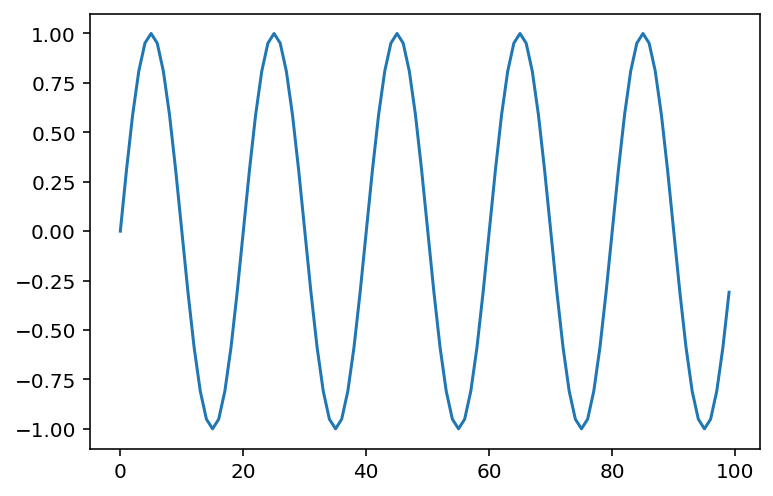

In [131]:
from math import sin
from math import pi
from matplotlib import pyplot
# create sequence
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/length)) for i in range(length)]
# plot sequence
pyplot.plot(sequence)
pyplot.show()

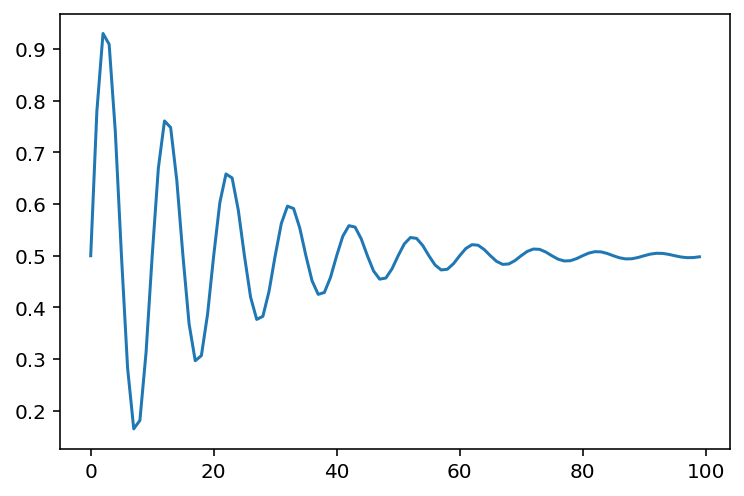

In [132]:
from math import sin
from math import pi
from math import exp
from matplotlib import pyplot
# create sequence
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
# plot sequence
pyplot.plot(sequence)
pyplot.show()

In [133]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [140]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

In [141]:
sequence

[0.5,
 0.7795593136340881,
 0.9302757613053906,
 0.9092909648031333,
 0.7406189311287741,
 0.5,
 0.28227898762686776,
 0.1649009001587169,
 0.18124387610726894,
 0.31260578801510625,
 0.49999999999999994,
 0.6695612949272942,
 0.7609754413629142,
 0.7482475188964647,
 0.645942759036884,
 0.5000000000000001,
 0.36794553073202174,
 0.296752121904157,
 0.3066646378878999,
 0.38633966497847333,
 0.4999999999999999,
 0.6028441240739802,
 0.6582896066186439,
 0.6505697314082972,
 0.5885187579189232,
 0.5000000000000001,
 0.4199049156368915,
 0.3767239304133354,
 0.3827361752723671,
 0.4310615220162345,
 0.49999999999999994,
 0.5623781144221591,
 0.5960074995280593,
 0.5913251585238285,
 0.5536893406375074,
 0.5000000000000001,
 0.45141987564150476,
 0.4252292841868198,
 0.42887589502752216,
 0.4581866994689218,
 0.49999999999999994,
 0.5378342388921021,
 0.5582314920261142,
 0.5553915086478185,
 0.5325642311964038,
 0.5000000000000001,
 0.4705346651239201,
 0.45464926841064596,
 0.4568610496

In [142]:
X

array([[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]])

In [143]:
y

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [194]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot

In [195]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [196]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])        
        X = array(X).reshape(n_patterns, length, 1)
        y = array(y).reshape(n_patterns, output)
        return X, y

In [197]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
pyplot.show()  

ValueError: cannot reshape array of size 20 into shape (5,20,1)

In [198]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])        
        X = array(X).reshape(n_patterns, length, 1)
        y = array(y).reshape(n_patterns, output)
        return X, y
 # test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o')
pyplot.show()             

ValueError: cannot reshape array of size 20 into shape (5,20,1)

In [201]:
# configure problem
length = 50
output = 5

#define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss= 'mae' , optimizer= 'adam')
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 50, 20)            1760      
_________________________________________________________________
lstm_34 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


In [204]:
#fit model
X, y = generate_examples(length, 1000, output)
model.fit(X, y, batch_size=10, epochs=1)

ValueError: cannot reshape array of size 50 into shape (1000,50,1)

In [205]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)

ValueError: cannot reshape array of size 50 into shape (1000,50,1)

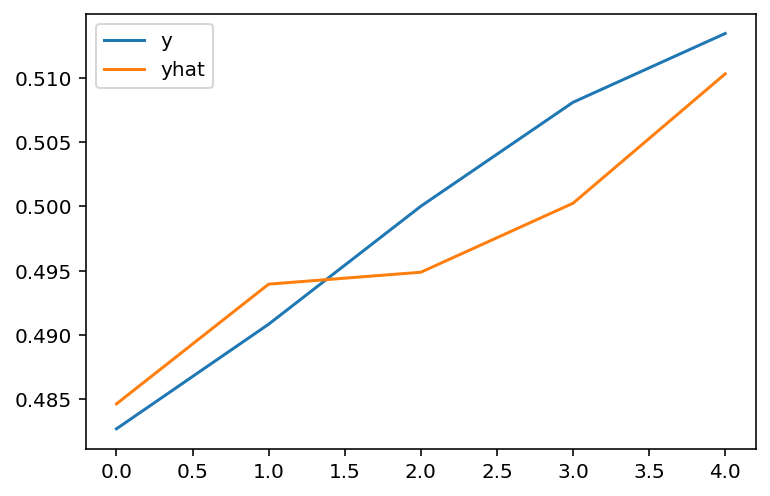

In [209]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label= 'y')
pyplot.plot(yhat[0], label= 'yhat')
pyplot.legend()
pyplot.show()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 50, 20)            1760      
_________________________________________________________________
lstm_38 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
10000/10000 [==============================] - 31s 3ms/step - loss: 0.0430
MAE: 0.018114


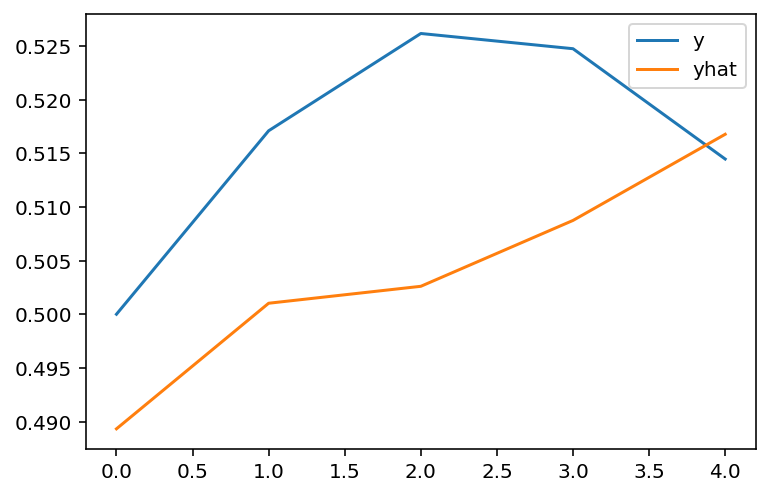

In [208]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y
# configure problem
length = 50
output = 5
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss= 'mae' , optimizer= 'adam')
print(model.summary())
# fit model
X, y = generate_examples(length, 10000, output)
history = model.fit(X, y, batch_size=10, epochs=1)
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label= 'y')
pyplot.plot(yhat[0], label= 'yhat')
pyplot.legend()
pyplot.show()